# **LAB6**

# Lab6 - Lab Assignment Six: Convolutional Network Architecture - Problem Statement

## Available: Nov 8, 2023 11:59pm

## Due Date: Dec 4, 2023 at 11:59 PM

### Data Scientist
- [Ben Brock](benbroc@gmail.com.com=project)
- [Cameron Jonathan Ervin](cjervin@smu.edu=project)
- [Jonathan Daniel Hunnicutt](jdhunnicutt@smu.edu=project)
- [MohammadAli Ezzati](ez@smu.edu=project)


---------------------------------------------------------------------------------------
## **Context**
--------------------------------------------------------------------------------
Deep Learning has found applications in many predictive tasks relating to more unstructured forms of data over the last few years, such as images, text, audio and video. Many of these tasks seem to be in the vein of a larger direction of predictive modeling that aims to match human-level performance on such tasks, because humans have evolved to specialize in performing intelligent actions on such unstructured data. As a specific branch of AI (also called Affective Computing or Emotion AI) Artificial Emotional Intelligence stands for the study and development of technologies and computers that can read human emotions by means of analyzing body gestures, facial expressions, voice tone, etc. and react appropriately to them.
In the field of human-machine interaction, facial expression recognition is critical. From recent research, it has been found that as much as 55% of communication of sentiment takes place through facial expressions and other visual cues. Therefore, training a model to identify facial emotions accurately is an important step towards the development of emotionally intelligent behavior in machines with AI capabilities. Automatic facial expression recognition systems could have many applications, including but not limited to any use case that requires human behavior understanding, detection of mental disorders, and creating a higher quality of virtual assistant for customer-facing businesses.

--------------------------------------------------------------------------------
## **Objective**
--------------------------------------------------------------------------------
The goal of this project is to use Deep Learning and Artificial Intelligence techniques to create a computer vision model that can accurately detect facial emotions. The model should be able to perform multi-class classification on images of facial expressions, to classify the expressions according to the associated emotion.

--------------------------------------------------------------------------------
## **About the dataset**
---------------------------------------------------------------------------------
The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

- ‘happy’: Images of people who have happy facial expressions.
- ‘sad’: Images of people with sad or upset facial expressions.
- ‘surprise’: Images of people who have shocked or surprised facial expressions.
- ‘neutral’: Images of people showing no prominent emotion in their facial expression at all.

## Train Test Split
- https://towardsdatascience.com/addressing-the-difference-between-keras-validation-split-and-sklearn-s-train-test-split-a3fb803b733

## Transfer Learning
- https://www.tensorflow.org/guide/keras/transfer_learning

## **List the Anaconda Virtual Environment**

In [1]:
import os; 
print(os.environ["CONDA_DEFAULT_ENV"])

py39_tensorflow


## **Importing the Libraries**

In [2]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from sklearn.metrics import (f1_score, 
                             fbeta_score)

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import (load_img,
                                                  img_to_array)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import (Dense,
                                     Input,
                                     Dropout,
                                     GlobalAveragePooling2D,
                                     Flatten,
                                     Conv2D,
                                     BatchNormalization,
                                     Activation,
                                     MaxPooling2D,
                                     LeakyReLU)

from tensorflow.keras.models import (Model,
                                     Sequential)

from tensorflow.keras.optimizers import (Adam,
                                         SGD,
                                         RMSprop)

from tensorflow.keras.utils import plot_model

### **Let us load the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
# Storing the path of the data file from the Google drive
path = 'data\\Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
picture_size = 48
folder_path = "Facial_emotion_images/"
folder_path1 = "Facial_emotion_images\\"

## **Visualizing our Classes**

Let's look at our classes.

## <b>Training Dataset</b>

### **Happy**

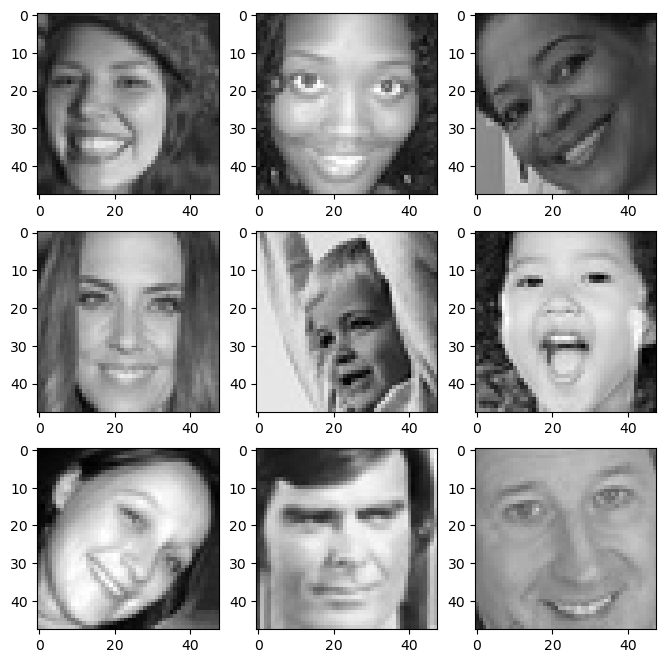

In [8]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
*  One defining feature for this class can be the wide curve of their lips.
*  Their eyebrows look relaxed and their eyes are either relaxed, or narrowed.

### **Sad**

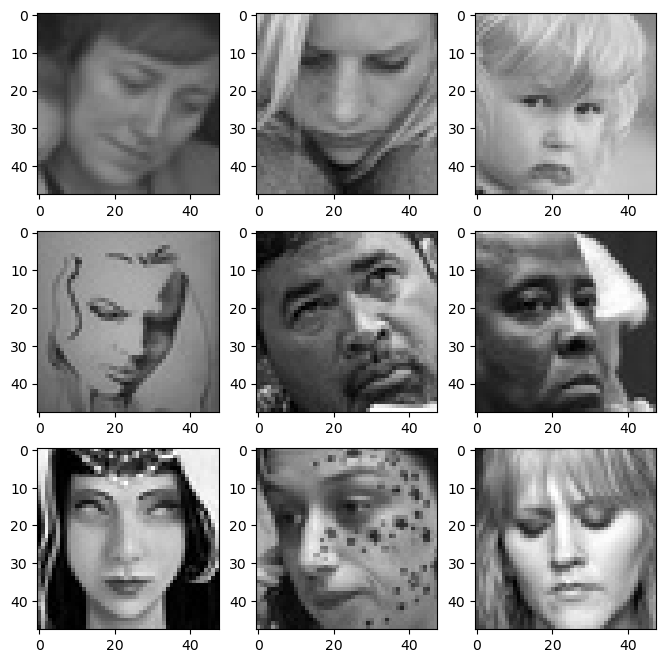

In [9]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* Most images from this class have hands present somewhere in the picture, either covering their mouth or their eyes.

* Their eyebrows are shrunk inwards.

* Unlike the class 'happy', this class doesn't show widely opened or stretched lips.

### **Neutral**

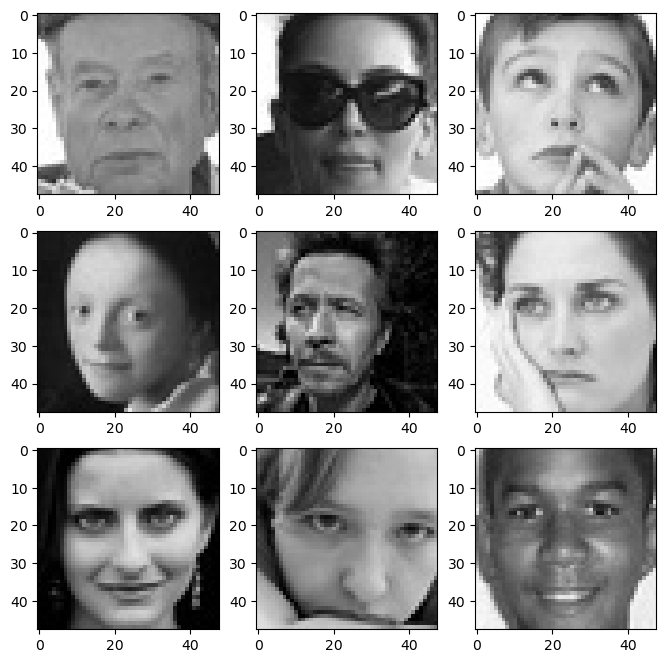

In [10]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* These images don't show any particular pattern in their eyes.

* The lips are neither stretched nor open.

* The eyebrows are vertically aligned with the rest of the face and don't form any angle.

### **Surprised**

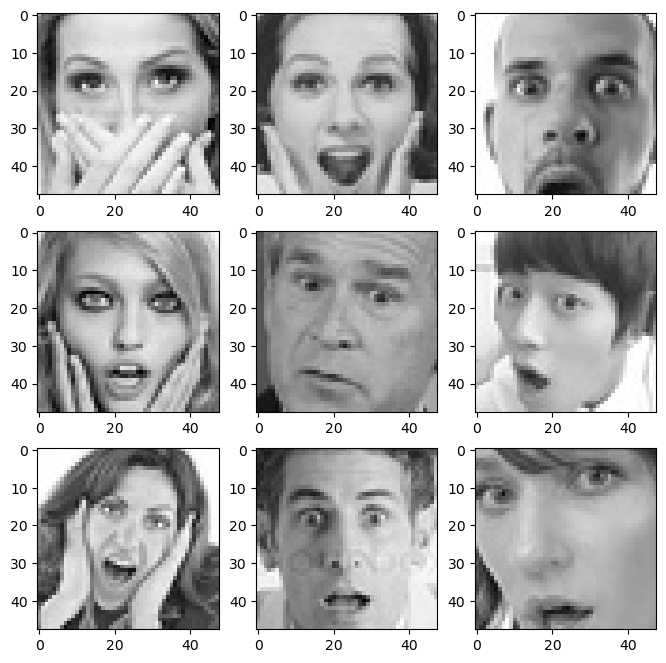

In [11]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* These images have eyes and their mouths opened the widest.

* Some of them also show hands. They are either covering the face or are present on the cheeks.

* The eyebrows are stretched outwards.

## **Checking Distribution of Training Classes**

In [12]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("TRAINING Dataset: Number of images in the class 'happy':   ", num_happy)

num_sad = num_sad = len(os.listdir(folder_path + "train/sad"))
print("TRAINING Dataset: Number of images in the class 'sad':   ", num_sad)

num_neutral = num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("TRAINING Dataset: Number of images in the class 'neutral':   ", num_neutral)

num_surprise = num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("TRAINING Dataset: Number of images in the class 'surprise':   ", num_surprise)

print(f"\nTotal number of classes in the Training Dataset: {(num_happy + num_sad + num_neutral + num_surprise)}")

TRAINING Dataset: Number of images in the class 'happy':    3976
TRAINING Dataset: Number of images in the class 'sad':    3982
TRAINING Dataset: Number of images in the class 'neutral':    3978
TRAINING Dataset: Number of images in the class 'surprise':    3173

Total number of classes in the Training Dataset: 15109


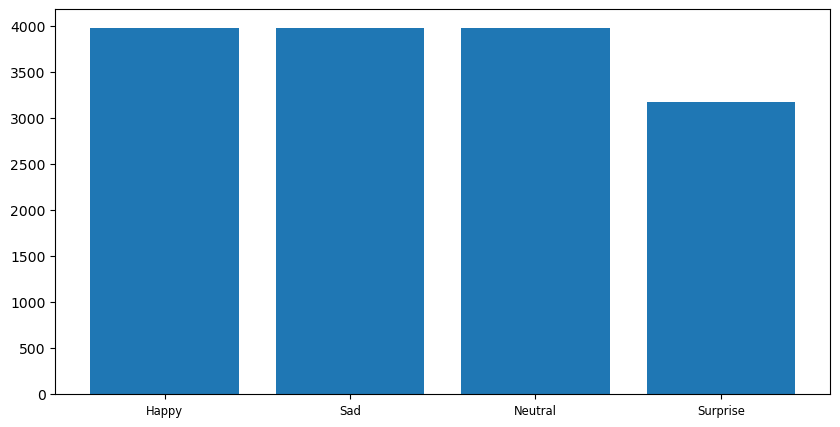

In [13]:
# Plotting histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:**

* The classes, 'happy', 'sad,' and 'neutral' have nearly the same number of images.

* However the images present in the 'surprise' class is a little lower than the other 3 classes. But we can say that overall, our dataset is balanced as a single class doesn't predominate our data.
* The classes 'Happy', and 'Sad, 'Neutral, have 1000 more images than the class 'Surprise'. But since the imbalance is lower than 25 percent, we can assume it's not going to create any major problems going ahead.
* A few common EDA tasks often associated with Deep Learning are converting from rgb to grayscale and/or hsv, and finding the mean of images. None of those would provide any meaningful insights here because while the former has no scope in this project as we have to focus more on detecting curves and edges from within the face that defines the emotion, the latter would provide a blurred image which would be the mean of all images and thus, most of the information conveyed through edges and curves would get lost.

## <b>Validation Dataset</b>

### **Happy**

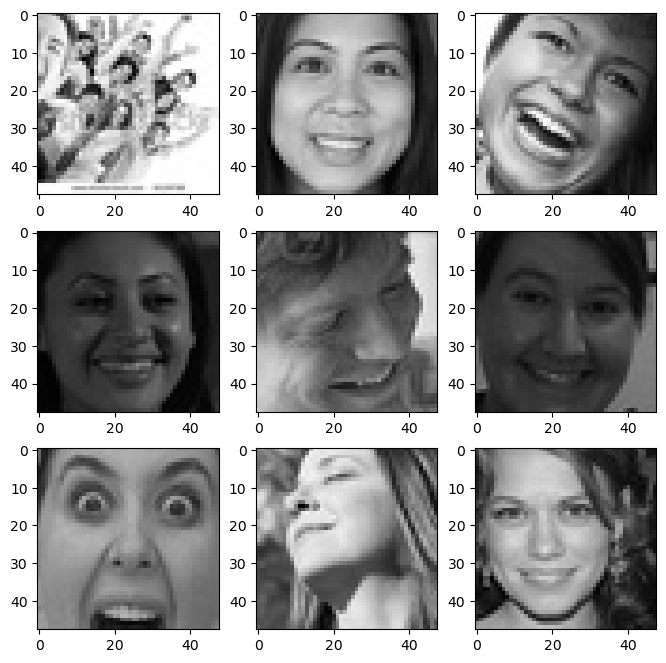

In [14]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "validation/" + expression + "/" +
                  os.listdir(folder_path + "validation/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
*  One defining feature for this class can be the wide curve of their lips.
*  Their eyebrows look relaxed and their eyes are either relaxed, or narrowed.

### **Sad**

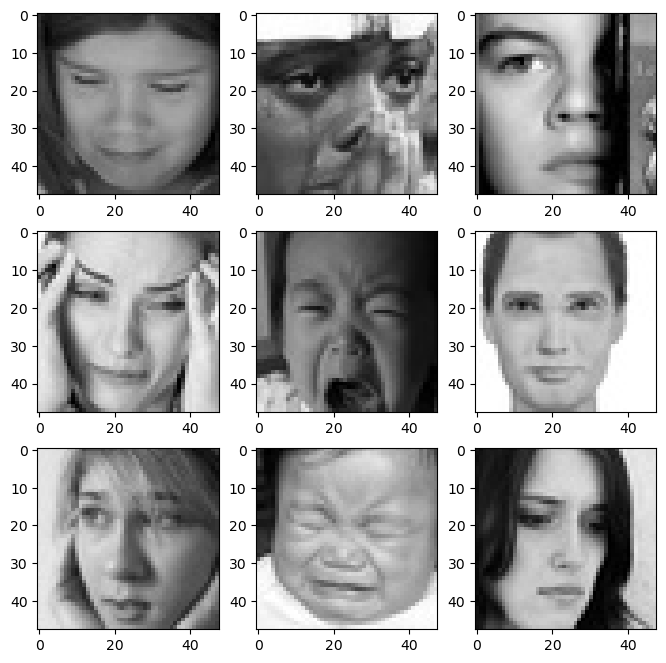

In [15]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "validation/" + expression + "/" +
                  os.listdir(folder_path + "validation/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* Most images from this class have hands present somewhere in the picture, either covering their mouth or their eyes.

* Their eyebrows are shrunk inwards.

* Unlike the class 'happy', this class doesn't show widely opened or stretched lips.

### **Neutral**

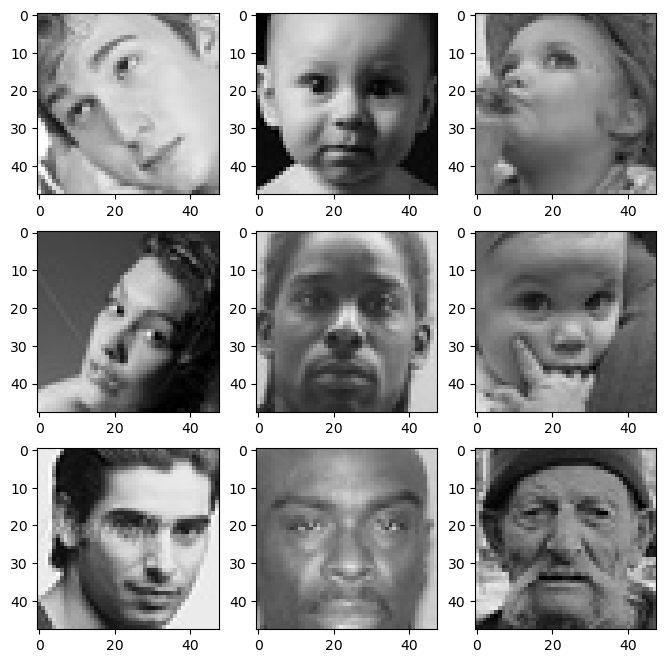

In [16]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "validation/" + expression + "/" +
                  os.listdir(folder_path + "validation/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* These images don't show any particular pattern in their eyes.

* The lips are neither stretched nor open.

* The eyebrows are vertically aligned with the rest of the face and don't form any angle

### **Surprised**

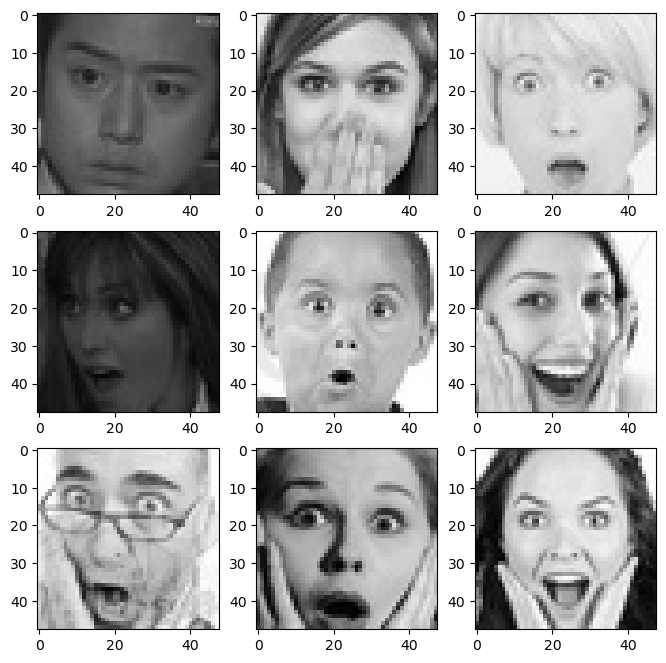

In [17]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "validation/" + expression + "/" +
                  os.listdir(folder_path + "validation/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* These images have eyes and their mouths opened the widest.

* Some of them also show hands. They are either covering the face or are present on the cheeks.

* The eyebrows are stretched outwards.

## **Checking Distribution of Validation Classes**

In [18]:
# Getting count of images in each folder within our validation path
num_happy = len(os.listdir(folder_path + "validation/happy"))
print("VALIDATION Dataset: Number of images in the class 'happy':   ", num_happy)

num_sad = num_sad = len(os.listdir(folder_path + "validation/sad"))
print("VALIDATION Dataset: Number of images in the class 'sad':   ", num_sad)

num_neutral = num_neutral = len(os.listdir(folder_path + "validation/neutral"))
print("VALIDATION Dataset: Number of images in the class 'neutral':   ", num_neutral)

num_surprise = num_surprise = len(os.listdir(folder_path + "validation/surprise"))
print("VALIDATION Dataset: Number of images in the class 'surprise':   ", num_surprise)

print(f"\nTotal number of classes in the Validation Dataset: {(num_happy + num_sad + num_neutral + num_surprise)}")

VALIDATION Dataset: Number of images in the class 'happy':    1825
VALIDATION Dataset: Number of images in the class 'sad':    1139
VALIDATION Dataset: Number of images in the class 'neutral':    1216
VALIDATION Dataset: Number of images in the class 'surprise':    797

Total number of classes in the Validation Dataset: 4977


## <b>Test Dataset</b>

### **Happy**

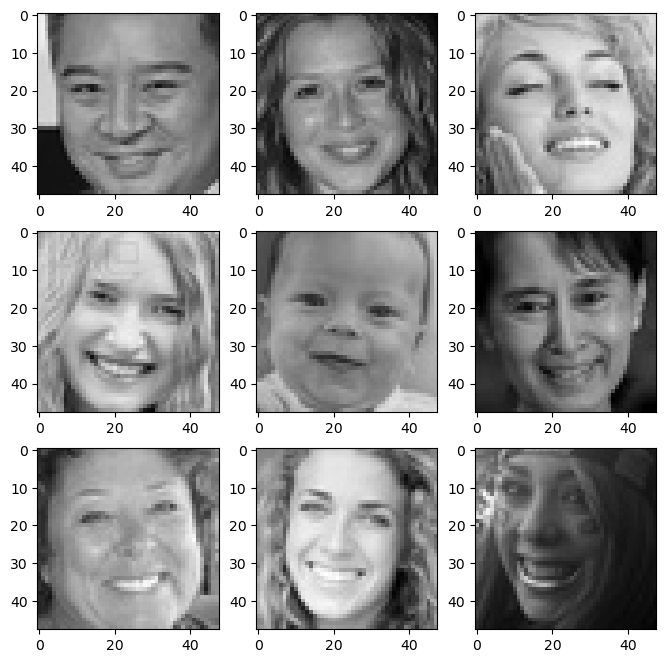

In [19]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "test/" + expression + "/" +
                  os.listdir(folder_path + "test/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
*  One defining feature for this class can be the wide curve of their lips.
*  Their eyebrows look relaxed and their eyes are either relaxed, or narrowed.

### **Sad**

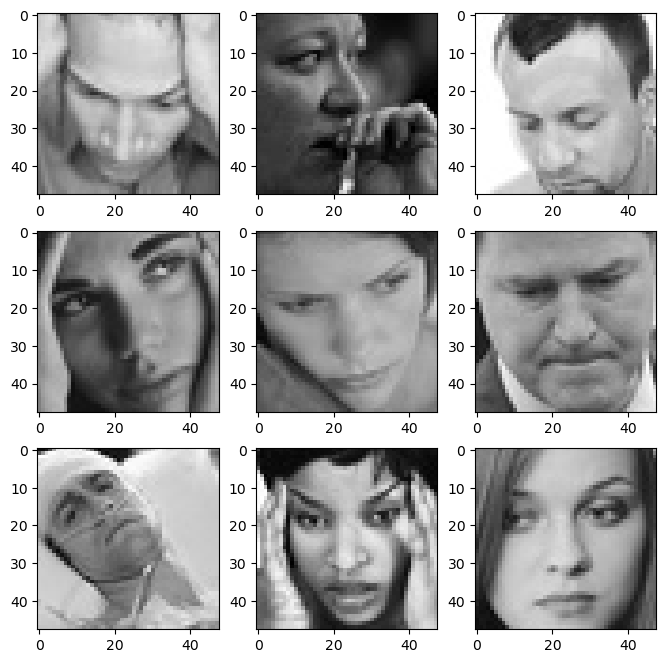

In [20]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "test/" + expression + "/" +
                  os.listdir(folder_path + "test/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* Most images from this class have hands present somewhere in the picture, either covering their mouth or their eyes.

* Their eyebrows are shrunk inwards.

* Unlike the class 'happy', this class doesn't show widely opened or stretched lips.

### **Neutral**

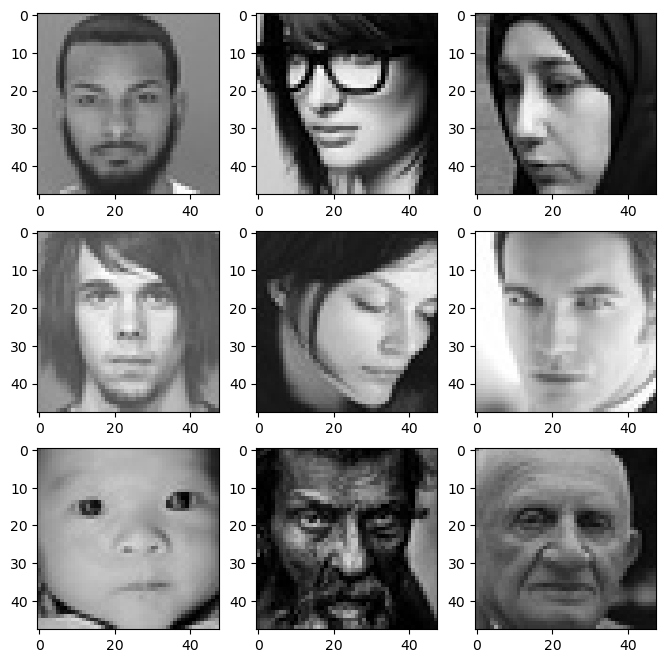

In [21]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "test/" + expression + "/" +
                  os.listdir(folder_path + "test/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* These images don't show any particular pattern in their eyes.

* The lips are neither stretched nor open.

* The eyebrows are vertically aligned with the rest of the face and don't form any angle

### **Surprised**

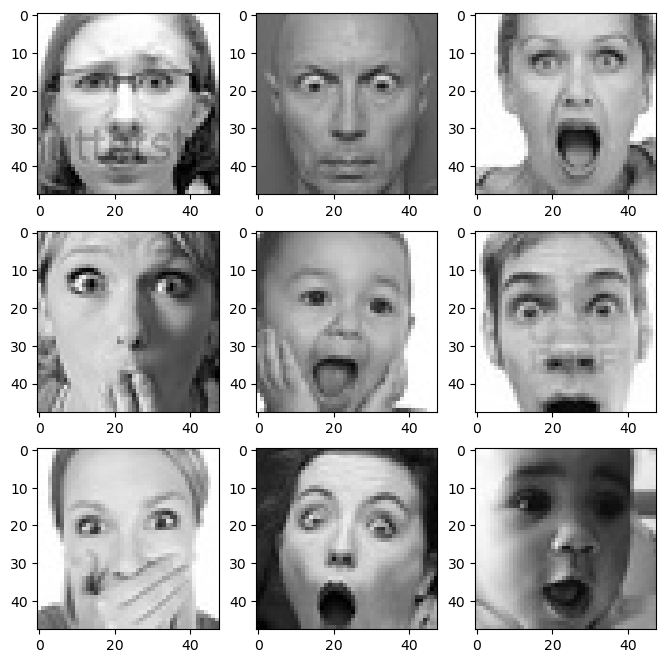

In [22]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "test/" + expression + "/" +
                  os.listdir(folder_path + "test/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* These images have eyes and their mouths opened the widest.

* Some of them also show hands. They are either covering the face or are present on the cheeks.

* The eyebrows are stretched outwards.

## **Checking Distribution of Test Classes**

In [23]:
# Getting count of images in each folder within our test path
num_happy = len(os.listdir(folder_path + "test/happy"))
print("TRAINING Dataset: Number of images in the class 'happy':   ", num_happy)

num_sad = num_sad = len(os.listdir(folder_path + "test/sad"))
print("TRAINING Dataset: Number of images in the class 'sad':   ", num_sad)

num_neutral = num_neutral = len(os.listdir(folder_path + "test/neutral"))
print("TRAINING Dataset: Number of images in the class 'neutral':   ", num_neutral)

num_surprise = num_surprise = len(os.listdir(folder_path + "test/surprise"))
print("TRAINING Dataset: Number of images in the class 'surprise':   ", num_surprise)

print(f"\nTotal number of classes in the Test Dataset: {(num_happy + num_sad + num_neutral + num_surprise)}")

TRAINING Dataset: Number of images in the class 'happy':    32
TRAINING Dataset: Number of images in the class 'sad':    32
TRAINING Dataset: Number of images in the class 'neutral':    32
TRAINING Dataset: Number of images in the class 'surprise':    32

Total number of classes in the Test Dataset: 128


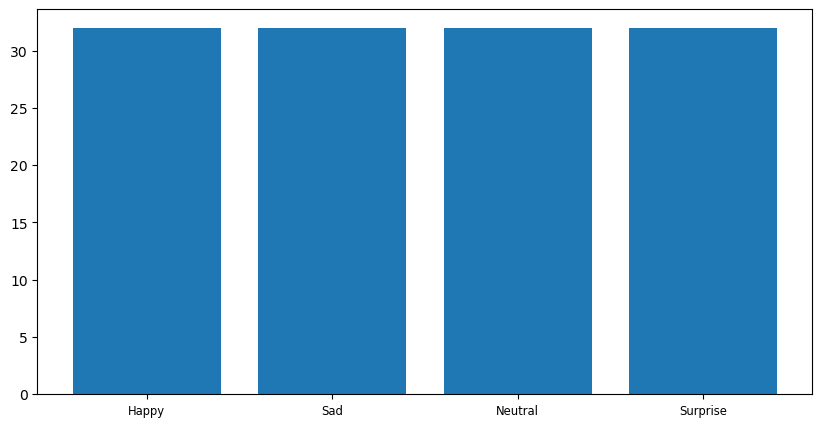

In [24]:
# Plotting histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:**

* The classes, 'happy', 'sad,' 'surprise, and 'neutral' have nearly the same number of images within the test set distribution.
* The training dataset (15,109) distribution of classes for emotions still out number both the Validation (5977) dataset and Test (128) dataset distribution of classes.  


**Preparation (3.0 points total)**
- Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a <b>detailed argument for why this (these) metric(s) are appropriate</b> on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

## Summarization of the Choice of F2 Score Metric for Evaluating Algorithm Performance

### Context:
The task at hand involves classifying facial expressions into four emotion categories: 'happy', 'sad', 'neutral', and 'surprise'. The dataset exhibits an imbalanced distribution among these classes. Our goal is to choose an appropriate metric to evaluate the performance of the algorithm, considering the unique characteristics of the data.

### Challenges with Accuracy:
Accuracy alone is not the optimal metric for this task due to the class imbalance. In cases where certain classes dominate the dataset, a model can achieve high accuracy by simply predicting the majority class, failing to capture the nuances of emotion classification.

### Importance of Precision and Recall:
In emotion classification, precision and recall are crucial metrics. Precision ensures that when the model predicts an emotion, it is likely correct, while recall ensures that the model identifies the majority of instances of a given emotion.

### Selection of F2 Score:
The F1 score is a standard choice for classification tasks, considering the harmonic mean of precision and recall. However, due to the importance of recall in emotion classification, we opt for the F2 score, which provides a weighted balance between precision and recall.

### Handling Imbalanced Classes:
The dataset's imbalanced nature, with varying instances across emotion classes, necessitates a metric that is sensitive to both false positives and false negatives. The F2 score achieves this balance by assigning more weight to recall, aligning with the objective of comprehensive emotion detection.

### Rigorous Evaluation with Cross-Validation:
Stratified 10-fold cross-validation is employed to ensure that the evaluation process is robust and representative of the class distribution in each fold. This approach reflects a commitment to producing results that generalize well to unseen data.

### F2 Score Metric:
The F2 score specifically addresses the importance of recall, weighted to break the balance between precision and recall. This choice is supported by the nature of emotion classification, where capturing as many instances of true emotions as possible is essential.

### Keras F2 Metric Implementation:
To reinforce the F2 score evaluation, a custom Keras F2 metric is provided. This metric is designed to calculate the F2 score using precision and recall, further emphasizing the significance of both metrics in the evaluation process.

### Conclusion:
The chosen evaluation approach demonstrates a thoughtful consideration of the unique challenges posed by the imbalanced dataset. By selecting the F2 score, we prioritize recall while maintaining a balance with precision, ensuring that the algorithm's performance is comprehensively assessed for real-world applicability.

### References:
- [Towards Data Science - F1 Score and Beyond: A Practical Guide](https://towardsdatascience.com/is-f1-the-appropriate-criterion-to-use-what-about-f2-f3-f-beta-4bd8ef17e285)
- [Kaggle - Keras F2 Metric](https://www.kaggle.com/code/ryanzhang/keras-f2-metric/notebook)

In [25]:
import keras.backend as K

def f2_micro(y_true, y_pred):
    agreement = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    total_true_positive = K.sum(K.round(K.clip(y_true, 0, 1)))
    total_pred_positive = K.sum(K.round(K.clip(y_pred, 0, 1)))
    recall = agreement / (total_true_positive + K.epsilon())
    precision = agreement / (total_pred_positive + K.epsilon())
    
    return (1+2**2)*((precision*recall)/(2**2*precision+recall+K.epsilon()))

**Preparation**
  -  Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). <b>Explain why your chosen method is appropriate or use more than one method as appropriate.</b> Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice.

As we can see from the Train dataset Exploration Data Analysis (EDA) of the number of Emotion types, the number of instances in the four EMOTION classes is similar except for instances in class surprise. The number of instances is only 3173, yet the number of which belong to other classes are around 3976.  It is clear that our dataset is unbalanced. An imbalanced dataset may result in potential risks when we train the model. In order to eliminate the negative influence 
of imbalance, we decided to import sklearn's train_test_split library package to  perform the train and test partitioning of dataset.
Because the train_test_split library package is able to maintain the percentage of each class in the dataset and randomly split the data 
into train and test datasets with a 80:20 ratio.

In summary, our approach demonstrates a careful selection of techniques that are well-suited for handling imbalanced datasets and ensuring a realistic mirroring of how the algorithm would be used in practice.

TRAINING Dataset: Number of images in the class 'happy':    3976
TRAINING Dataset: Number of images in the class 'sad':    3982
TRAINING Dataset: Number of images in the class 'neutral':    3978
TRAINING Dataset: Number of images in the class 'surprise':    3173

Total number of classes in the Training Dataset: 15109


The Facial_emotion_images.zip zipped dataset already had the entire Facial Emotion Images split into the Train, Validation, and Test datasets.  There was no need for our team to use sklearn's train_test_split library package to randomly split the data into train, test and validation datasets with 80:20 ratios. We wanted to explain the process to make sure we covered all of the input requirements and had a strong understanding of the overall usecase. 

Our team has decided to use **Stratified 10-fold cross-validation** (`StratifiedKFold(n_splits=10)`).

**Reasoning:**
- This method is appropriate when dealing with an imbalanced dataset, as it ensures that each fold maintains the same class distribution as the original dataset.
- Stratified cross-validation is particularly useful when you have minority classes that might be underrepresented in the dataset.

### Overall Approach:

- Our chosen approach reflects a thoughtful consideration of the dataset's characteristics, aiming to address issues related to imbalanced classes.
- By using Stratified 10-fold cross-validation, you are ensuring that the evaluation process is robust and representative of the class distribution in each fold.
- The F2 score as the scoring method aligns well with the imbalanced nature of the dataset, providing a more comprehensive evaluation of the model's performance.

## Observation
- In our code base for the Facial Emotions Images model classifier, there was no need to train_test_split the into X_train, X_test, X_val datasets because our data was already in the X_train, X_test, and X_val datasets already.

## **Modeling**
Setup the training to use data expansion in Keras (also called data augmentation). Explain why the chosen data expansion techniques are appropriate for your dataset. You can use the keras ImageGenerator as a pre-processing step OR in the optimization loop. You can also use the Keras-cv augmenter (a separate package: https://keras.io/keras_cv/ Links to an external site.) 


## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [122]:
%%time

batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                        brightness_range=(0.,2.),
                                        rescale=1./255,
                                        shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = batch_size,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = False)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale=1./255,
                                  shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                  target_size = (img_size,img_size),
                                                  color_mode = 'grayscale',
                                                  batch_size = batch_size,
                                                  classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
CPU times: total: 547 ms
Wall time: 1.23 s


In [146]:
from sklearn.metrics import f1_score, fbeta_score

labels = ['happy', 'sad', 'neutral', 'surprise']

def summarize_net_update(net, X_test, y_test, title_text='', beta=2):
    """
    You can call this function with beta=1 for F1 score and beta=2 for F2 score. For example:
    
    summarize_net_update(net, X_test, y_test, title_text='F1 Score', beta=1)
    summarize_net_update(net, X_test, y_test, title_text='F2 Score', beta=2)
    """
    plt.figure(figsize=(15, 5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test, yhat)
    
    # Calculate F1 score or F2 score based on the value of beta
    if beta == 1:
        score = f1_score(y_test, yhat, average='weighted')
    else:
        score = fbeta_score(y_test, yhat, beta=beta, average='weighted')
    
    cm = mt.confusion_matrix(y_test, yhat)
    cm = cm / np.sum(cm, axis=1)[:, np.newaxis]
    
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.title(f'{title_text} - Score: {score:.4f}')


## **Model Building**

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Assuming TYPES_OF_EMOTIONS is defined as 4
TYPES_OF_EMOTIONS = 4

# Create a 3-layer ANN
ann = Sequential()
ann.add(Flatten(input_shape=(48, 48, 1)))  # Flatten the input image
ann.add(Dense(128, activation='relu'))
ann.add(Dense(56, activation='relu'))
ann.add(Dense(TYPES_OF_EMOTIONS, activation='softmax'))

In [124]:
ann.compile(optimizer='adam', 
            loss='categorical_crossentropy', 
            metrics=['accuracy', f2_micro])

In [125]:
# Print the summary of the ANN
ann.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 2304)              0         
                                                                 
 dense_29 (Dense)            (None, 128)               295040    
                                                                 
 dense_30 (Dense)            (None, 56)                7224      
                                                                 
 dense_31 (Dense)            (None, 4)                 228       
                                                                 
Total params: 302,492
Trainable params: 302,492
Non-trainable params: 0
_________________________________________________________________


## <b>Plot the ANN Model</b>

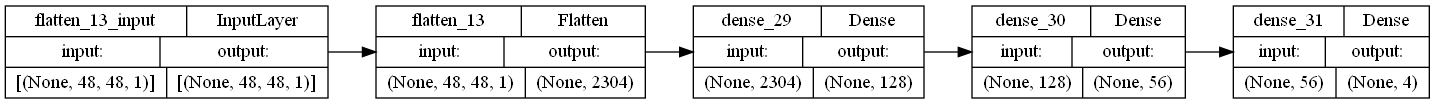

In [126]:
plot_model(
    ann, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

### **Compiling and Training the Model**

In [127]:
%%time

from keras.callbacks import (ModelCheckpoint,
                             EarlyStopping,
                             ReduceLROnPlateau)

checkpoint = ModelCheckpoint("./model1.h5",
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

CPU times: total: 0 ns
Wall time: 0 ns


## Cell Below Takes Approximately 10+ minutes to complete

In [128]:
%%time

# Fit the ANN model
history = ann.fit(train_set,
                      steps_per_epoch=train_set.n // train_set.batch_size,
                      epochs=epochs,
                      validation_data=validation_set,
                      validation_steps=validation_set.n // validation_set.batch_size,
                      callbacks=callbacks_list)

Epoch 1/20
472/472 [==============================] - 22s 45ms/step - loss: 1.3631 - accuracy: 0.3391 - f2_micro: 0.0385 - val_loss: 1.2720 - val_accuracy: 0.4327 - val_f2_micro: 0.0189 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - 21s 44ms/step - loss: 1.2968 - accuracy: 0.3917 - f2_micro: 0.0803 - val_loss: 1.2427 - val_accuracy: 0.4619 - val_f2_micro: 0.1097 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - 21s 44ms/step - loss: 1.2741 - accuracy: 0.4127 - f2_micro: 0.0999 - val_loss: 1.2164 - val_accuracy: 0.4690 - val_f2_micro: 0.1810 - lr: 0.0010
Epoch 4/20
472/472 [==============================] - 23s 48ms/step - loss: 1.2688 - accuracy: 0.4210 - f2_micro: 0.1192 - val_loss: 1.2339 - val_accuracy: 0.4538 - val_f2_micro: 0.2150 - lr: 0.0010
Epoch 5/20
472/472 [==============================] - 22s 47ms/step - loss: 1.2456 - accuracy: 0.4371 - f2_micro: 0.1357 - val_loss: 1.2379 - val_accuracy: 0.4353 - val_f2_micro: 0.1342 - lr: 0.0010
Epoch

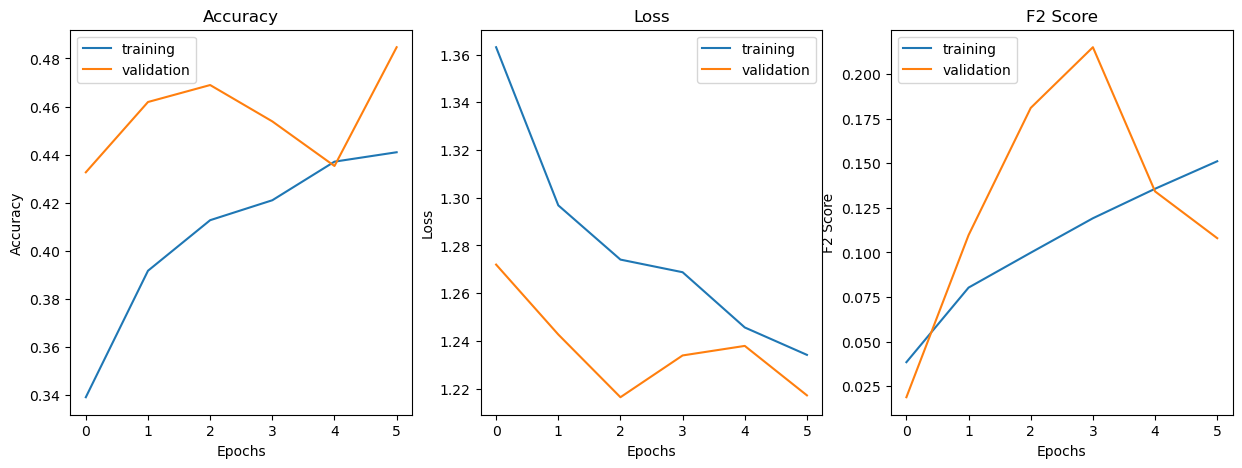

In [129]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()


**Observation: Think About It:**

* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? What are the advantages of CNNs over ANNs and are they applicable here?
  * CNN's are the right approach because it's an image classification task, and CNNs are suited best for this task.
  * Although an ANN can also classify images once we flatten the image into 1-D arrays before feeding it to an ANN, an ANN would fail to tackle the issue of local spatiality, which is where a CNN performs better.

### **Creating the Base Neural Network**

Our Base Neural network will be a fairly simple model architecture.

* We want our Base Neural Network architecture to have 3 convolutional blocks.
* Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around with the dropout ratio.
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a dropout ratio of 0.2.
* Add a second Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
* Add a third Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add a Dropout layer with dropout ratio of 0.4.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

## CNN MODEL1

In [34]:
%%time

# Initializing a Sequential Model
model1 = Sequential()

# Adding the first Convolutional block
model1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", input_shape = (48, 48, 1)))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

# Adding the second Convolutional block
model1.add(Conv2D(filters=32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

# Adding the third Convolutional block
model1.add(Conv2D(filters=32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

# Adding the Flatten layer
model1.add(Flatten())

# Adding the first Dense layer
model1.add(Dense(512,activation = "relu"))
model1.add(Dropout(0.4))

# Adding the final layer
model1.add(Dense(4,activation = "softmax"))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)       

## <b>Plot the 1st CNN Model</b>

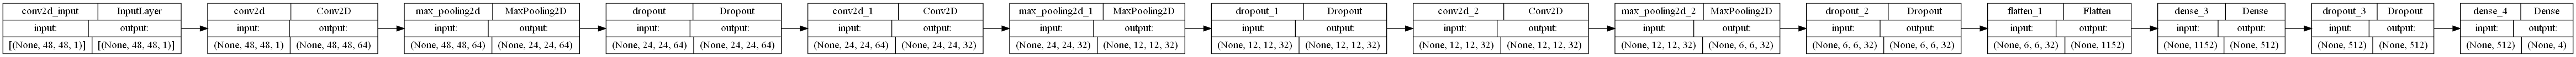

In [35]:
plot_model(
    model1, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

### **Compiling and Training the Model**

In [36]:
%%time

from keras.callbacks import (ModelCheckpoint,
                             EarlyStopping,
                             ReduceLROnPlateau)

checkpoint = ModelCheckpoint("./model1.h5",
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

CPU times: total: 0 ns
Wall time: 0 ns


In [37]:
%%time

model1.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.001),
              metrics=['accuracy', f2_micro])

CPU times: total: 0 ns
Wall time: 20.4 ms


## <b>Cell Took Approximately 30+ minutes to execute</b>

In [38]:
%%time

history = model1.fit(train_set,
                    steps_per_epoch = train_set.n//train_set.batch_size,
                    epochs = epochs,
                    validation_data = validation_set,
                    validation_steps = validation_set.n//validation_set.batch_size,
                    callbacks = callbacks_list)

Epoch 1/20
472/472 [==============================] - 60s 123ms/step - loss: 1.3574 - accuracy: 0.3092 - f2_micro: 0.0139 - val_loss: 1.2276 - val_accuracy: 0.4490 - val_f2_micro: 0.0593 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - 57s 121ms/step - loss: 1.2227 - accuracy: 0.4500 - f2_micro: 0.1509 - val_loss: 1.1335 - val_accuracy: 0.5290 - val_f2_micro: 0.1714 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - 60s 127ms/step - loss: 1.1352 - accuracy: 0.4996 - f2_micro: 0.2470 - val_loss: 1.0278 - val_accuracy: 0.5706 - val_f2_micro: 0.3230 - lr: 0.0010
Epoch 4/20
472/472 [==============================] - 57s 121ms/step - loss: 1.0819 - accuracy: 0.5240 - f2_micro: 0.3055 - val_loss: 1.0152 - val_accuracy: 0.5746 - val_f2_micro: 0.3079 - lr: 0.0010
Epoch 5/20
472/472 [==============================] - 56s 119ms/step - loss: 1.0428 - accuracy: 0.5418 - f2_micro: 0.3440 - val_loss: 0.9975 - val_accuracy: 0.5726 - val_f2_micro: 0.3636 - lr: 0.0010


### **Evaluating the Model on the Test Set**

In [39]:
%%time

model1.evaluate(test_set)

4/4 [==============================] - 1s 162ms/step - loss: 0.8466 - accuracy: 0.6641 - f2_micro: 0.4655
CPU times: total: 219 ms
Wall time: 795 ms


[0.8466264009475708, 0.6640625, 0.46553075313568115]

**Observations and Insights:**

* The model training didn't run for half as many epochs as we wanted it to. The model training stopped because training accuracy was not improving any further for many epochs.
* All three of training, validation, and test accuracy are nowhere near a decent number. Hence we will completely discard this model and not use it for any further analysis.

## <b>Compare ANN/MLP Model and the CNN Model</b>

In [40]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score, fbeta_score
import seaborn as sns
%matplotlib inline

def compare_mlp_cnn_f2_beta(cnn, mlp, X_test, y_test, class_names=None, beta=2):
    plt.figure(figsize=(15, 5))
    
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(X_test), axis=1)
        
        # Calculate F1 score or F2 score based on the value of beta
        if beta == 1:
            score = f1_score(y_test, yhat_cnn, average='weighted')
        else:
            score = fbeta_score(y_test, yhat_cnn, beta=beta, average='weighted')

        plt.subplot(1, 2, 1)
        cm = mt.confusion_matrix(y_test, yhat_cnn)
        cm = cm / np.sum(cm, axis=1)[:, np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
        plt.title(f'CNN: {score:.4f}')

    if mlp is not None:
        yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)
        
        # Calculate F1 score or F2 score based on the value of beta
        if beta == 1:
            score = f1_score(y_test, yhat_mlp, average='weighted')
        else:
            score = fbeta_score(y_test, yhat_mlp, beta=beta, average='weighted')
            
        plt.subplot(1, 2, 2)
        cm = mt.confusion_matrix(y_test, yhat_mlp)
        cm = cm / np.sum(cm, axis=1)[:, np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
        plt.title(f'ANN: {score:.4f}')
    
    plt.show()

4/4 [==============================] - 0s 27ms/step


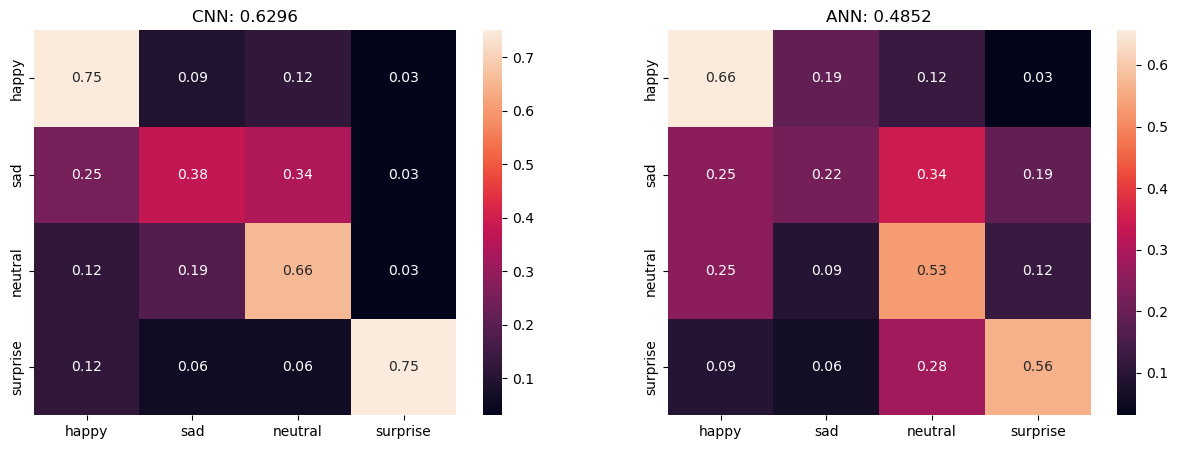

In [41]:
# Assuming you have the class names defined
class_names = ['happy', 'sad', 'neutral', 'surprise']

compare_mlp_cnn_f2_beta(model1, ann, test_set, test_set.labels, class_names, beta=2)

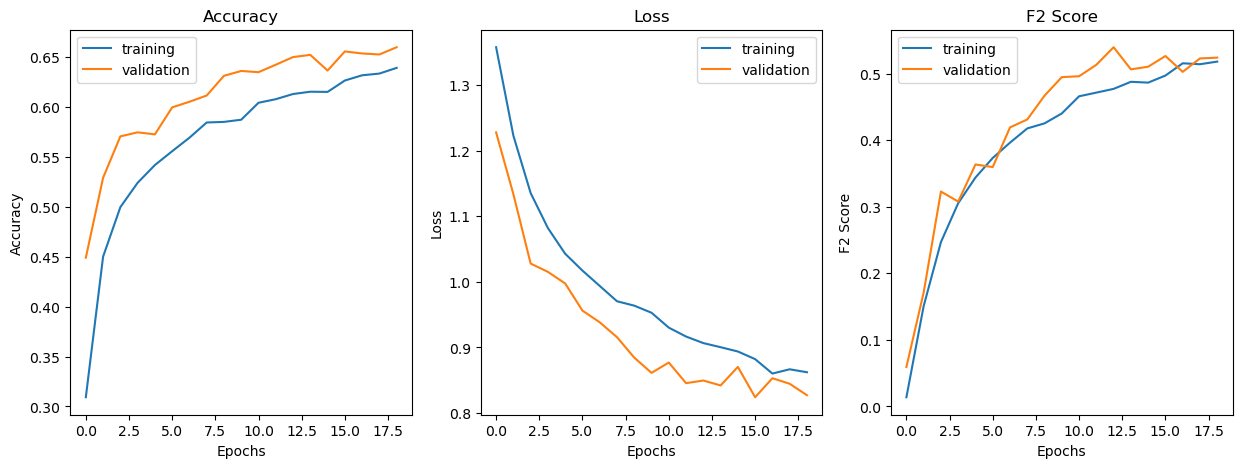

In [42]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()


## Observation
- TO DO

## Notes from Chang
- F1 = 2 x Precision × Recall / (Precision×Recall)
- F2 = 5 X Precision × Recall / ((4×Precision)+Recall)

## Definition
- F1 score is the harmonic mean of precision and recall. It conveys the balance between the precision and the recall.
- F2 score is a variant of the F1 score that gives more weight to recall than to precision. It's useful in situations where missing a positive (a false negative) is more harmful than incorrectly labeling a negative as a positive (a false positive).

## CNN1 MODEL2

In [43]:
%%time

NUM_CLASSES = TYPES_OF_EMOTIONS

# CREATE A CNN WITH ONLY ONE CONVOLUTIONAL LAYER AND ONE OUTPUT LAYER

# make a CNN with conv layer and max pooling
cnn = Sequential() 
cnn.add( Conv2D(filters=16, kernel_size= (2, 2), padding='same', 
                input_shape=(48, 48, 1),
               ) )

cnn.add( MaxPooling2D(pool_size=(2, 2)) )
cnn.add( Activation('relu') )
# add one layer on flattened output
cnn.add( Flatten() )
cnn.add( Dense(NUM_CLASSES) )
cnn.add( Activation('softmax') )

CPU times: total: 46.9 ms
Wall time: 54.2 ms


In [44]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 16)        80        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 activation (Activation)     (None, 24, 24, 16)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_5 (Dense)             (None, 4)                 36868     
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                      

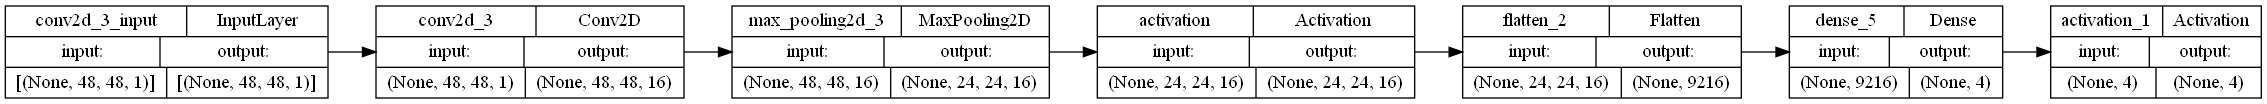

In [45]:
plot_model(
    cnn, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [46]:
# Let's train the model 
cnn.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy', f2_micro])

## Cell Below Takes Approximately 10+ minutes to complete

In [47]:
%%time
history = cnn.fit(train_set,
                    steps_per_epoch = train_set.n//train_set.batch_size,
                    epochs = epochs,
                    validation_data = validation_set,
                    validation_steps = validation_set.n//validation_set.batch_size,
                    callbacks = callbacks_list,
                    shuffle=True)

Epoch 1/20
472/472 [==============================] - 22s 46ms/step - loss: 0.1770 - accuracy: 0.3883 - f2_micro: 0.0418 - val_loss: 0.1650 - val_accuracy: 0.4615 - val_f2_micro: 0.0958 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - 21s 44ms/step - loss: 0.1616 - accuracy: 0.4791 - f2_micro: 0.1612 - val_loss: 0.1564 - val_accuracy: 0.5113 - val_f2_micro: 0.1936 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - 23s 49ms/step - loss: 0.1553 - accuracy: 0.5096 - f2_micro: 0.2287 - val_loss: 0.1546 - val_accuracy: 0.5060 - val_f2_micro: 0.2618 - lr: 0.0010
Epoch 4/20
472/472 [==============================] - 22s 47ms/step - loss: 0.1511 - accuracy: 0.5277 - f2_micro: 0.2659 - val_loss: 0.1520 - val_accuracy: 0.5323 - val_f2_micro: 0.2508 - lr: 0.0010
Epoch 5/20
472/472 [==============================] - 23s 48ms/step - loss: 0.1472 - accuracy: 0.5449 - f2_micro: 0.3076 - val_loss: 0.1474 - val_accuracy: 0.5492 - val_f2_micro: 0.3097 - lr: 0.0010
Epoch

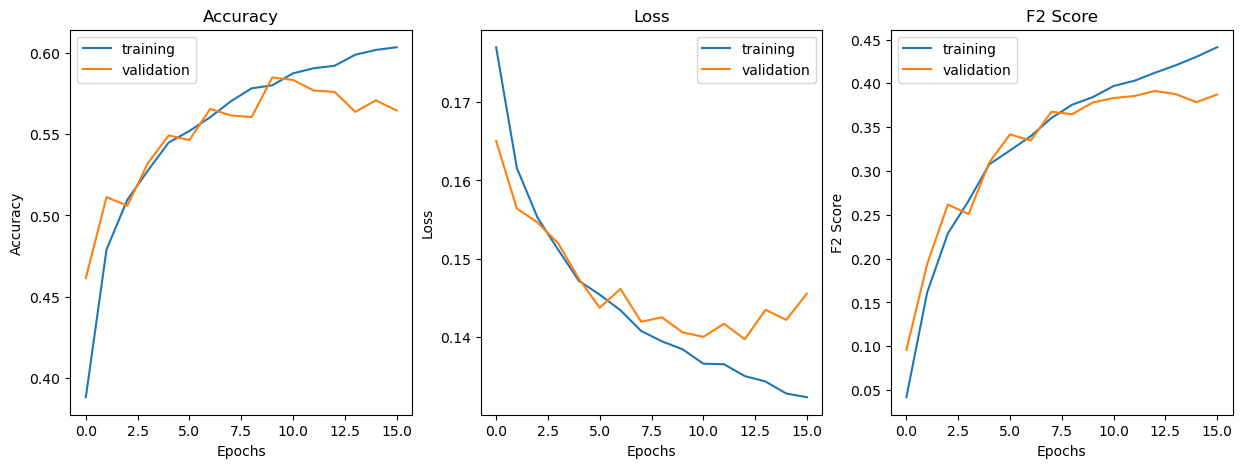

In [48]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()


4/4 [==============================] - 0s 32ms/step


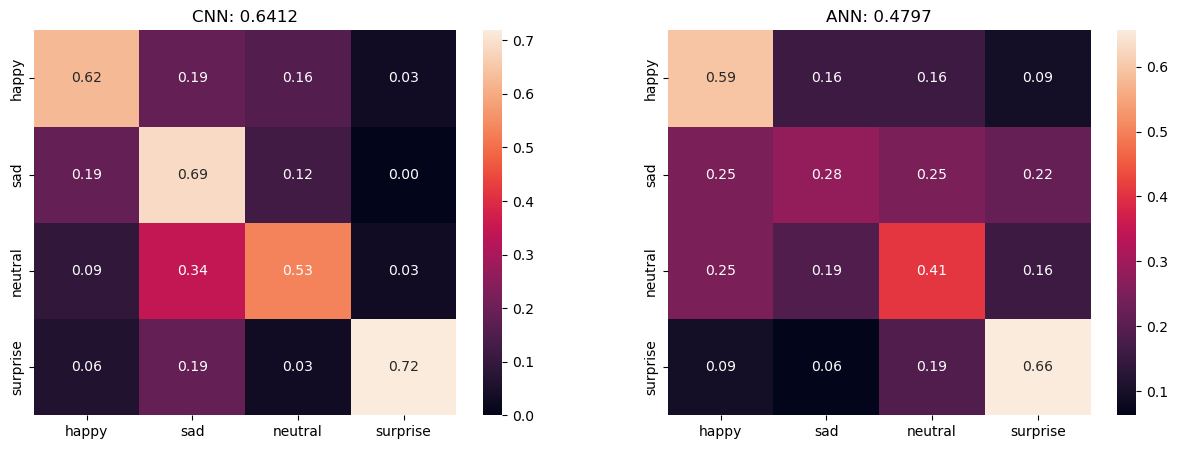

In [49]:
# Assuming you have the class names defined
class_names = ['happy', 'sad', 'neutral', 'surprise']

compare_mlp_cnn_f2_beta(cnn, ann, test_set, test_set.labels, class_names, beta=2)

## CNN2 MODEL3

In [50]:
%%time

NUM_CLASSES = TYPES_OF_EMOTIONS

# changes: 
#    1. increased kernel size
cnn2 = Sequential(name='3by3_kernel')
cnn2.add( Conv2D(filters=16, kernel_size= (3, 3), 
                padding='same', input_shape=(48, 48, 1),
                ) )
cnn2.add( Activation('relu') )
cnn2.add( MaxPooling2D(pool_size=(2, 2)) )
# add one layer on flattened output
cnn2.add( Flatten() )
cnn2.add( Dense(NUM_CLASSES, activation='softmax') )

# Let's train the model 
cnn2.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy', f2_micro])

CPU times: total: 15.6 ms
Wall time: 54.1 ms


In [51]:
input_shape = [None, 48,48,1]
cnn2.build(input_shape)
print(cnn2.summary())

Model: "3by3_kernel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 16)        160       
                                                                 
 activation_2 (Activation)   (None, 48, 48, 16)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 4)                 36868     
                                                                 
Total params: 37,028
Trainable params: 37,028
Non-trainable params: 0
___________________________________________________

## <b>Cell Below Takes Approximately 15+ minutes to complete</b>

In [52]:
%%time
history = cnn2.fit(train_set,
                    steps_per_epoch = train_set.n//train_set.batch_size,
                    epochs = epochs,
                    validation_data = validation_set,
                    validation_steps = validation_set.n//validation_set.batch_size,
                    callbacks = callbacks_list,
                    shuffle=True)

Epoch 1/20
472/472 [==============================] - 24s 49ms/step - loss: 0.1802 - accuracy: 0.3692 - f2_micro: 0.0313 - val_loss: 0.1731 - val_accuracy: 0.3790 - val_f2_micro: 0.0868 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - 22s 46ms/step - loss: 0.1617 - accuracy: 0.4844 - f2_micro: 0.1618 - val_loss: 0.1566 - val_accuracy: 0.5036 - val_f2_micro: 0.2006 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - 24s 50ms/step - loss: 0.1543 - accuracy: 0.5152 - f2_micro: 0.2451 - val_loss: 0.1494 - val_accuracy: 0.5569 - val_f2_micro: 0.2701 - lr: 0.0010
Epoch 4/20
472/472 [==============================] - 32s 67ms/step - loss: 0.1500 - accuracy: 0.5331 - f2_micro: 0.2916 - val_loss: 0.1480 - val_accuracy: 0.5510 - val_f2_micro: 0.3113 - lr: 0.0010
Epoch 5/20
472/472 [==============================] - 26s 54ms/step - loss: 0.1465 - accuracy: 0.5469 - f2_micro: 0.3232 - val_loss: 0.1523 - val_accuracy: 0.5248 - val_f2_micro: 0.2865 - lr: 0.0010
Epoch

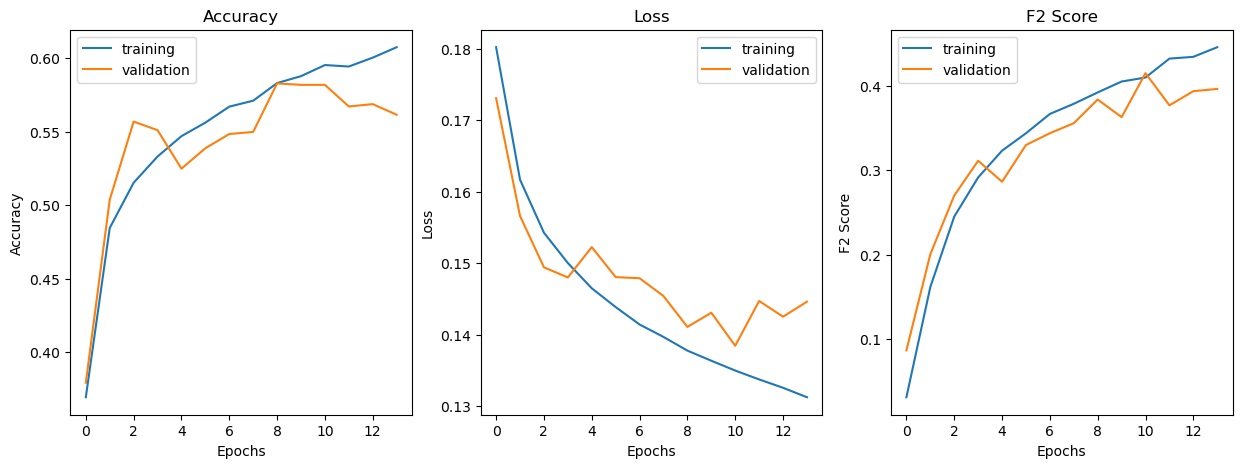

In [56]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()


4/4 [==============================] - 0s 33ms/step


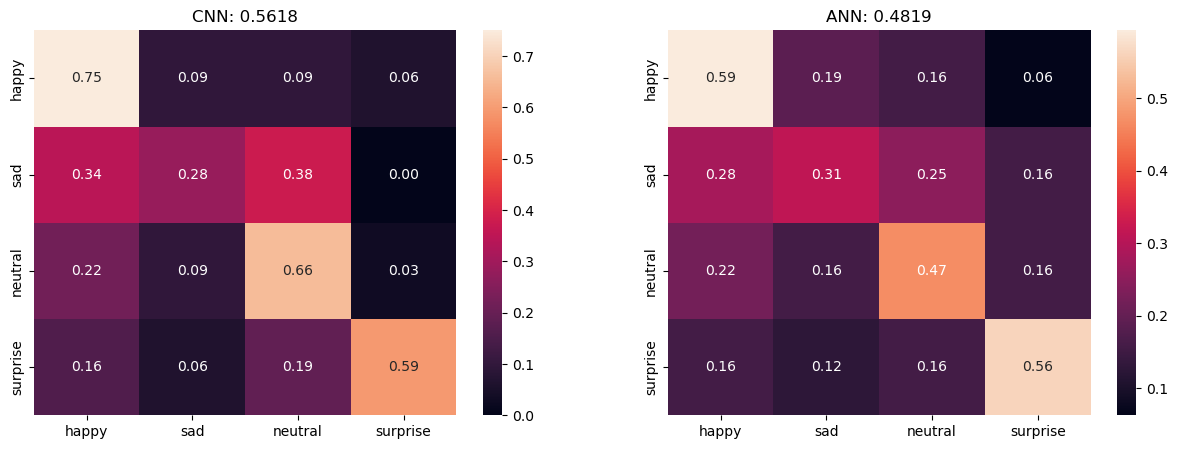

In [54]:
# Assuming you have the class names defined
class_names = ['happy', 'sad', 'neutral', 'surprise']

compare_mlp_cnn_f2_beta(cnn2, ann, test_set, test_set.labels, class_names, beta=2)

## CNN3 MODEL

In [71]:
%%time

# changes: 
#    1. increased kernel size
#    2. add another conv/pool layer 
cnn3 = Sequential(name='two_layer_cnn')

num_filt_layers = [32, 32]
for num_filters in num_filt_layers:
    cnn3.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same',
                     ) )
    cnn3.add( Activation('relu'))
    cnn3.add( MaxPooling2D(pool_size=(2, 2)) )
    

# add one layer on flattened output
cnn3.add( Flatten() )
cnn3.add( Dense(NUM_CLASSES) )
cnn3.add( Activation('softmax') )

CPU times: total: 0 ns
Wall time: 15.2 ms


In [72]:
# Let's train the model 
cnn3.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy', f2_micro])

In [73]:
input_shape = [None, 48,48,1]
cnn3.build(input_shape)

In [74]:
cnn3.summary()

Model: "two_layer_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_8 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                

## <b>Cell Below Takes Approximately 15+ minutes to complete</b>

In [75]:
%%time
history = cnn3.fit(train_set,
                    steps_per_epoch = train_set.n//train_set.batch_size,
                    epochs = epochs,
                    validation_data = validation_set,
                    validation_steps = validation_set.n//validation_set.batch_size,
                    callbacks = callbacks_list,
                    shuffle=True)

Epoch 1/20
472/472 [==============================] - 42s 88ms/step - loss: 0.1739 - accuracy: 0.3954 - f2_micro: 0.0769 - val_loss: 0.1645 - val_accuracy: 0.4754 - val_f2_micro: 0.1500 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - 42s 89ms/step - loss: 0.1562 - accuracy: 0.5028 - f2_micro: 0.2487 - val_loss: 0.1498 - val_accuracy: 0.5369 - val_f2_micro: 0.3079 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - 42s 89ms/step - loss: 0.1472 - accuracy: 0.5451 - f2_micro: 0.3185 - val_loss: 0.1435 - val_accuracy: 0.5694 - val_f2_micro: 0.3532 - lr: 0.0010
Epoch 4/20
472/472 [==============================] - 43s 92ms/step - loss: 0.1407 - accuracy: 0.5721 - f2_micro: 0.3766 - val_loss: 0.1381 - val_accuracy: 0.5905 - val_f2_micro: 0.3941 - lr: 0.0010
Epoch 5/20
472/472 [==============================] - 43s 92ms/step - loss: 0.1354 - accuracy: 0.5907 - f2_micro: 0.4208 - val_loss: 0.1320 - val_accuracy: 0.6040 - val_f2_micro: 0.4381 - lr: 0.0010
Epoch

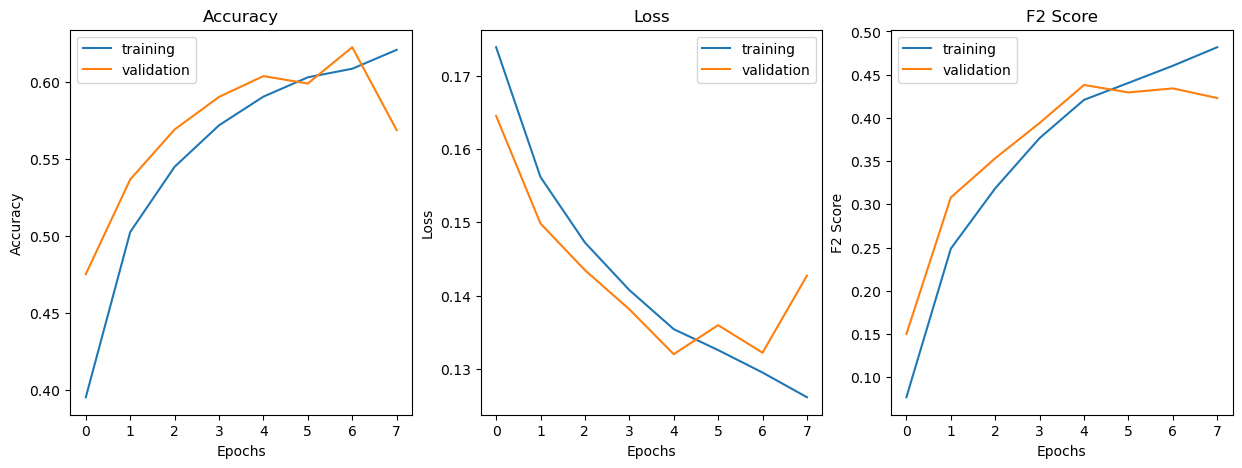

In [76]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()


4/4 [==============================] - 0s 54ms/step


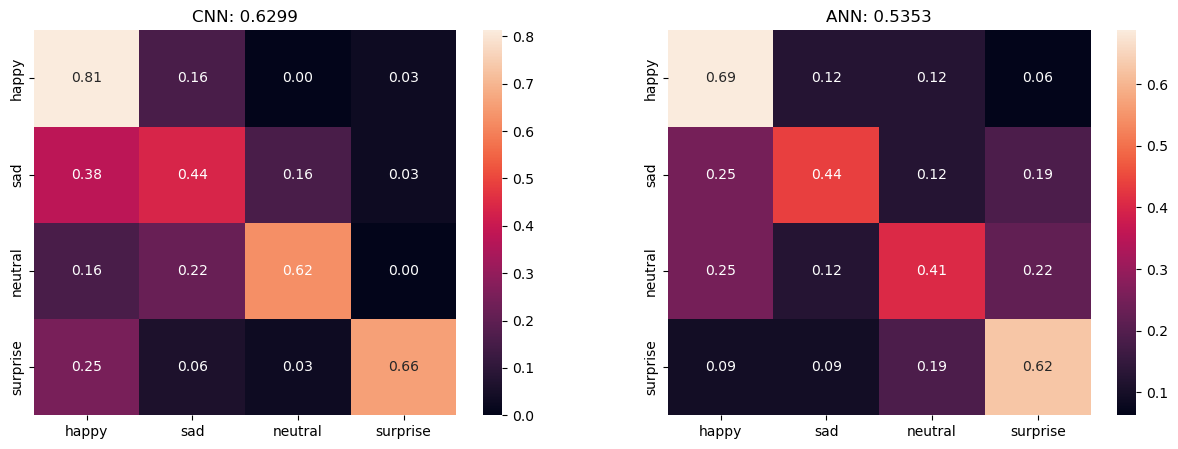

In [77]:
# Assuming you have the class names defined
class_names = ['happy', 'sad', 'neutral', 'surprise']

compare_mlp_cnn_f2_beta(cnn3, ann, test_set, test_set.labels, class_names, beta=2)

## CNN4 Model

In [78]:
%%time

# changes: 
#    1. increased kernel size
#    2. add another conv/pool layer with increasing num filters
#    3. add more layers once flattened
cnn4 = Sequential(name='two_layer_few_filters')

num_filt_layers = [16, 32]
for num_filters in num_filt_layers:
    cnn4.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same'))
    cnn4.add( Activation('relu'))
    cnn4.add( MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn4.add( Flatten() )
cnn4.add( Dense(100) )
cnn4.add( Activation('relu') )
cnn4.add( Dense(NUM_CLASSES) )
cnn4.add( Activation('softmax') )

CPU times: total: 0 ns
Wall time: 24.3 ms


In [79]:
# Let's train the model 
cnn4.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy', f2_micro])

In [80]:
input_shape = [None, 48,48,1]
cnn4.build(input_shape)

In [81]:
cnn4.summary()

Model: "two_layer_few_filters"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 48, 48, 16)        160       
                                                                 
 activation_11 (Activation)  (None, 48, 48, 16)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 activation_12 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                        

## <b>Cell Below Takes Approximately 15+ minutes to complete</b>

In [82]:
%%time
history = cnn4.fit(train_set,
                    steps_per_epoch = train_set.n//train_set.batch_size,
                    epochs = epochs,
                    validation_data = validation_set,
                    validation_steps = validation_set.n//validation_set.batch_size,
                    callbacks = callbacks_list,
                    shuffle=True)

Epoch 1/20
472/472 [==============================] - 38s 78ms/step - loss: 0.1744 - accuracy: 0.3917 - f2_micro: 0.0857 - val_loss: 0.1561 - val_accuracy: 0.5159 - val_f2_micro: 0.2331 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - 36s 76ms/step - loss: 0.1537 - accuracy: 0.5139 - f2_micro: 0.2785 - val_loss: 0.1525 - val_accuracy: 0.5206 - val_f2_micro: 0.2978 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - 36s 77ms/step - loss: 0.1431 - accuracy: 0.5485 - f2_micro: 0.3518 - val_loss: 0.1437 - val_accuracy: 0.5510 - val_f2_micro: 0.3190 - lr: 0.0010
Epoch 4/20
472/472 [==============================] - 37s 78ms/step - loss: 0.1357 - accuracy: 0.5826 - f2_micro: 0.4079 - val_loss: 0.1322 - val_accuracy: 0.5911 - val_f2_micro: 0.4480 - lr: 0.0010
Epoch 5/20
472/472 [==============================] - 36s 76ms/step - loss: 0.1305 - accuracy: 0.5960 - f2_micro: 0.4480 - val_loss: 0.1289 - val_accuracy: 0.5980 - val_f2_micro: 0.4477 - lr: 0.0010
Epoch

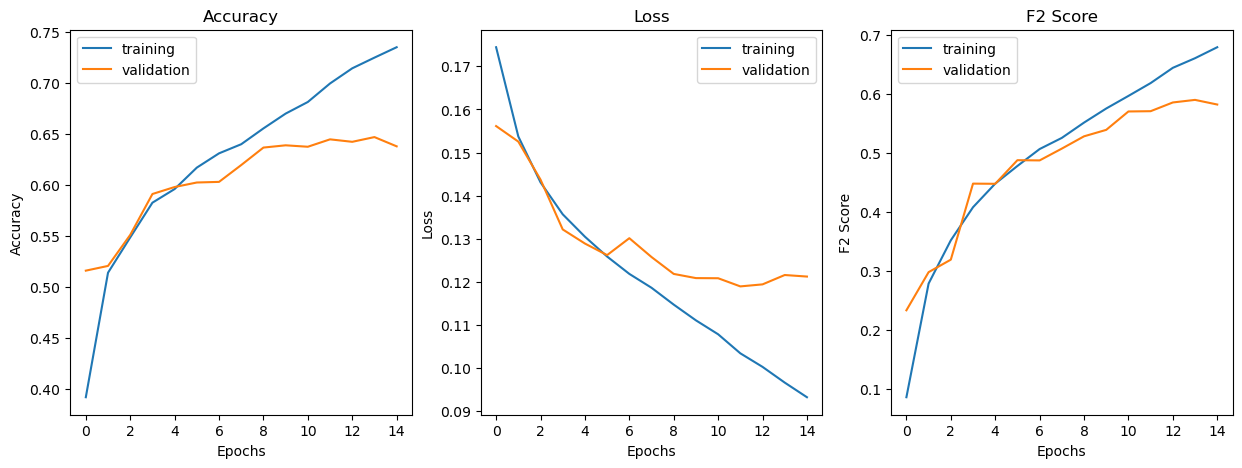

In [83]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()


4/4 [==============================] - 0s 32ms/step


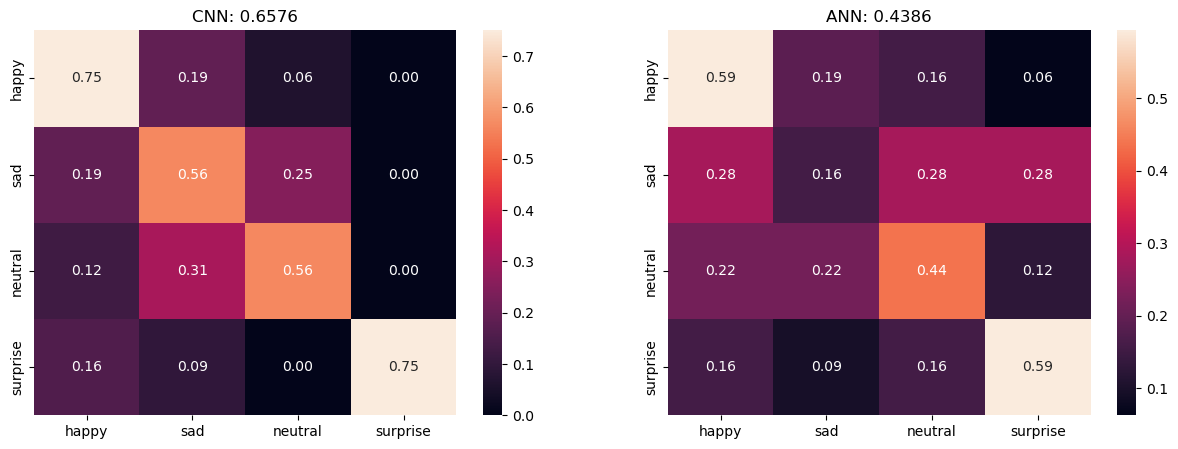

In [84]:
## Assuming you have the class names defined
class_names = ['happy', 'sad', 'neutral', 'surprise']

compare_mlp_cnn_f2_beta(cnn4, ann, test_set, test_set.labels, class_names, beta=2)

## CNN5 Model

In [85]:
%%time

# changes: 
#    1. Baseline: 2 conv layers and two output layers
cnn5 = Sequential()

num_filt_layers = [24, 24]
for num_filters in num_filt_layers:
    cnn5.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same') )
    cnn5.add( Activation('relu'))
    cnn5.add( MaxPooling2D(pool_size=(2, 2), 
                           ) )
    

# add one layer on flattened output
cnn5.add( Flatten() )
cnn5.add( Dense(100, activation='relu') )
cnn5.add( Dense(100, activation='relu') )
cnn5.add( Dense(NUM_CLASSES, activation='softmax') )

CPU times: total: 0 ns
Wall time: 13 ms


In [86]:
# Let's train the model 
cnn5.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy', f2_micro] )

In [87]:
input_shape = [None, 48,48,1]
cnn5.build(input_shape)

In [88]:
cnn5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 48, 48, 24)        240       
                                                                 
 activation_15 (Activation)  (None, 48, 48, 24)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 24)        5208      
                                                                 
 activation_16 (Activation)  (None, 24, 24, 24)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 24)       0         
 g2D)                                                 

## <b>Cell Below Approximately Takes 20+ minutes to complete</b>

In [89]:
%%time
history = cnn5.fit(train_set,
                    steps_per_epoch = train_set.n//train_set.batch_size,
                    epochs = epochs,
                    validation_data = validation_set,
                    validation_steps = validation_set.n//validation_set.batch_size,
                    callbacks = callbacks_list,
                    shuffle=True)

Epoch 1/20
472/472 [==============================] - 38s 79ms/step - loss: 0.1783 - accuracy: 0.3484 - f2_micro: 0.0509 - val_loss: 0.1592 - val_accuracy: 0.5014 - val_f2_micro: 0.1793 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - 38s 80ms/step - loss: 0.1542 - accuracy: 0.5037 - f2_micro: 0.2591 - val_loss: 0.1433 - val_accuracy: 0.5560 - val_f2_micro: 0.3547 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - 38s 80ms/step - loss: 0.1412 - accuracy: 0.5579 - f2_micro: 0.3612 - val_loss: 0.1372 - val_accuracy: 0.5760 - val_f2_micro: 0.3885 - lr: 0.0010
Epoch 4/20
472/472 [==============================] - 38s 80ms/step - loss: 0.1320 - accuracy: 0.5897 - f2_micro: 0.4363 - val_loss: 0.1366 - val_accuracy: 0.5772 - val_f2_micro: 0.3695 - lr: 0.0010
Epoch 5/20
472/472 [==============================] - 37s 78ms/step - loss: 0.1264 - accuracy: 0.6056 - f2_micro: 0.4766 - val_loss: 0.1261 - val_accuracy: 0.6113 - val_f2_micro: 0.5012 - lr: 0.0010
Epoch

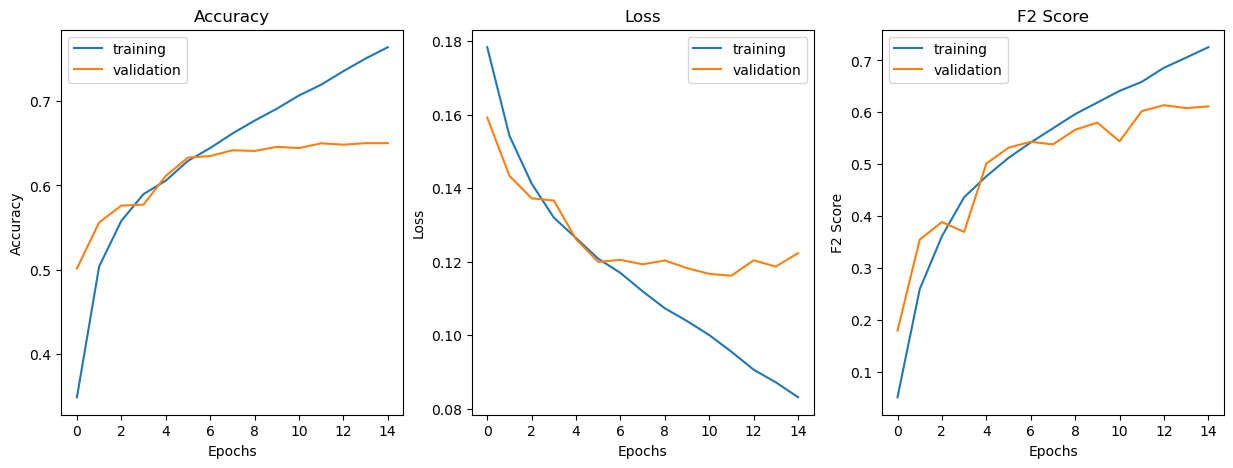

In [90]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()


4/4 [==============================] - 0s 29ms/step


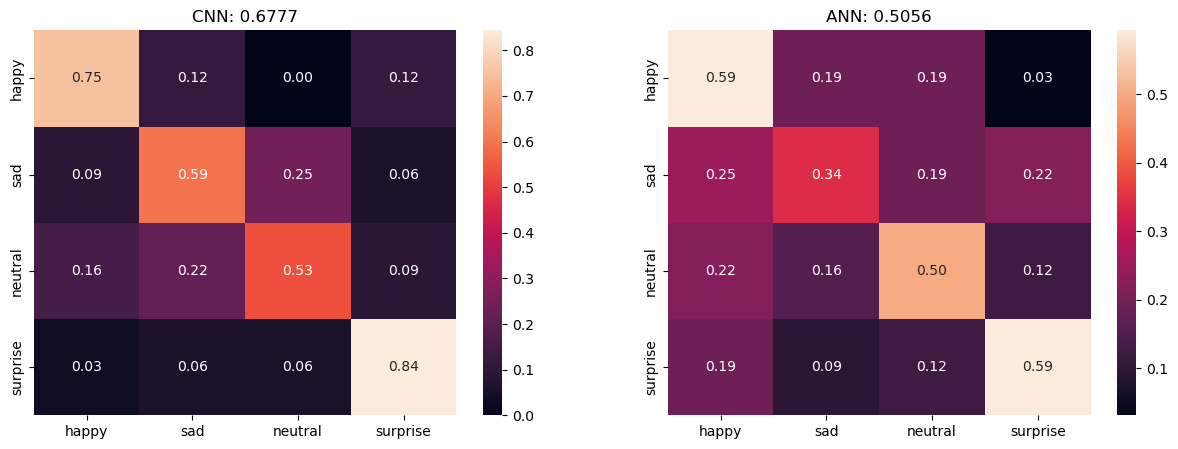

In [91]:
# Assuming you have the class names defined
class_names = ['happy', 'sad', 'neutral', 'surprise']

compare_mlp_cnn_f2_beta(cnn5, ann, test_set, test_set.labels, class_names, beta=2)

## CNN6 Model

In [92]:
%%time

cnn6 = Sequential()

num_filt_layers = [32, 64]
for num_filters in num_filt_layers:
    cnn6.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same', 
                    activation='relu',
                    ) ) # more compact syntax

    # max pooling
    cnn6.add( MaxPooling2D(pool_size=(2, 2) ) )
    

# add one layer on flattened output
cnn6.add( Dropout(0.25) ) # add some dropout for regularization after conv layers
cnn6.add( Flatten() )
cnn6.add( Dense(256, activation='relu') )
cnn6.add( Dropout(0.5) ) # add some dropout for regularization, again!
cnn6.add( Dense(NUM_CLASSES, activation='softmax') )

CPU times: total: 0 ns
Wall time: 10.3 ms


In [93]:
# Let's train the model 
cnn6.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy', f2_micro])

In [94]:
input_shape = [None, 48,48,1]
cnn6.build(input_shape)

In [95]:
cnn6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_9 (Flatten)         (None, 9216)             

## <b>Cell Below Takes Approximately 40+ minutes to complete</b>

In [96]:
%%time
history = cnn6.fit(train_set,
                    steps_per_epoch = train_set.n//train_set.batch_size,
                    epochs = epochs,
                    validation_data = validation_set,
                    validation_steps = validation_set.n//validation_set.batch_size,
                    callbacks = callbacks_list,
                    shuffle=True)

Epoch 1/20
472/472 [==============================] - 57s 118ms/step - loss: 1.2909 - accuracy: 0.3923 - f2_micro: 0.0914 - val_loss: 1.1634 - val_accuracy: 0.5016 - val_f2_micro: 0.2450 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - 56s 118ms/step - loss: 1.1457 - accuracy: 0.5049 - f2_micro: 0.2384 - val_loss: 1.0619 - val_accuracy: 0.5575 - val_f2_micro: 0.2971 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - 56s 118ms/step - loss: 1.0548 - accuracy: 0.5442 - f2_micro: 0.3376 - val_loss: 0.9622 - val_accuracy: 0.6103 - val_f2_micro: 0.4097 - lr: 0.0010
Epoch 4/20
472/472 [==============================] - 56s 119ms/step - loss: 1.0105 - accuracy: 0.5714 - f2_micro: 0.3916 - val_loss: 0.9525 - val_accuracy: 0.6040 - val_f2_micro: 0.4273 - lr: 0.0010
Epoch 5/20
472/472 [==============================] - 56s 119ms/step - loss: 0.9654 - accuracy: 0.5938 - f2_micro: 0.4382 - val_loss: 0.9282 - val_accuracy: 0.6151 - val_f2_micro: 0.4540 - lr: 0.0010


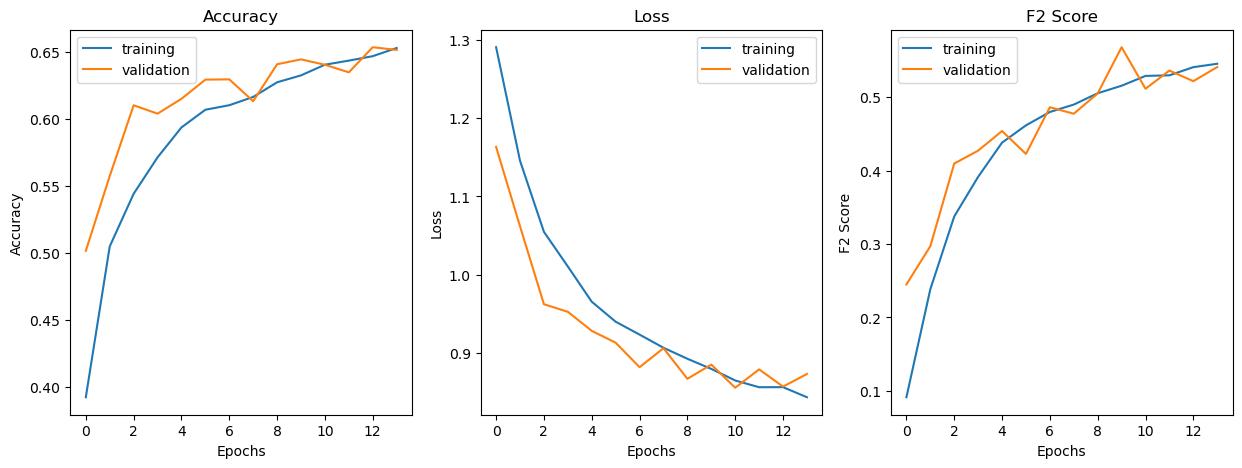

In [97]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()


4/4 [==============================] - 0s 32ms/step


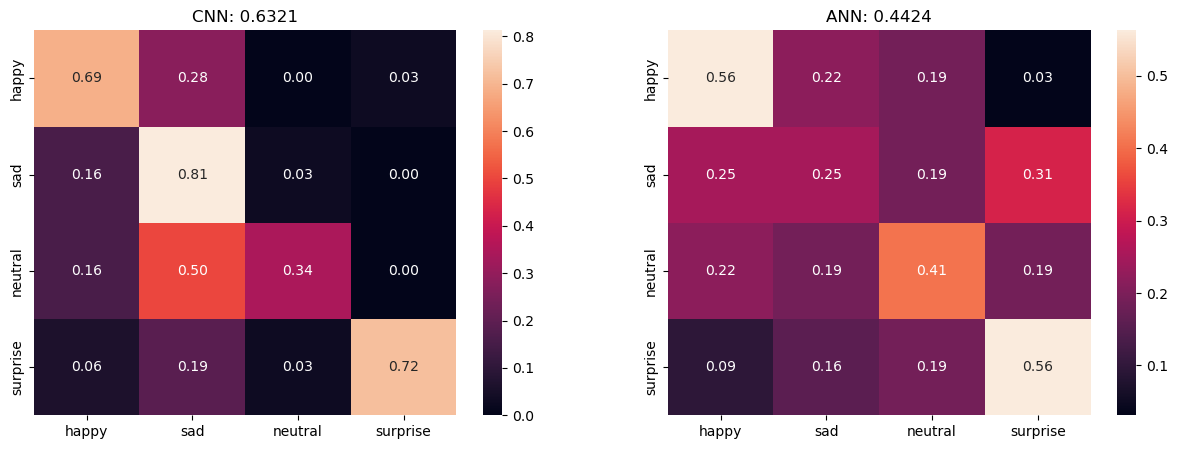

In [98]:
# Assuming you have the class names defined
class_names = ['happy', 'sad', 'neutral', 'surprise']

compare_mlp_cnn_f2_beta(cnn6, ann, test_set, test_set.labels, class_names, beta=2)

## NEW CNN MODEL 7

### **Creating the seventh Convolutional Neural Network**

In the second Neural network, we will add a few more Convolutional blocks. We will also use Batch Normalization layers.

* This time, each Convolutional block will have 1 Conv2D layer, followed by a BatchNormalization, LeakuRelU, and a MaxPooling2D layer. We are not adding any Dropout layer this time.
* Add first Conv2D layer with **256 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, and Maxpooling2D layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, and Maxpooling2D layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **32 filters**.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add the second Dense Layer with **128 neurons** and use **'relu' activation** function.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [99]:
%%time

# Creating sequential model
model7 = Sequential(name = "model7")

# Adding the first Convolutional block
model7.add(Conv2D(filters = 256, kernel_size = 2, padding = "same", activation = "relu", input_shape = (48, 48, 1)))
model7.add(BatchNormalization())
model7.add(LeakyReLU(0.1))
model7.add(MaxPooling2D(pool_size = 2))

# Adding the second Convolutional block
model7.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
model7.add(BatchNormalization())
model7.add(LeakyReLU(0.1))
model7.add(MaxPooling2D(pool_size = 2))

# Adding the third Convolutional block
model7.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model7.add(BatchNormalization())
model7.add(LeakyReLU(0.1))
model7.add(MaxPooling2D(pool_size = 2))

# Adding the fourth Convolutional block
model7.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model7.add(BatchNormalization())
model7.add(LeakyReLU(0.1))
model7.add(MaxPooling2D(pool_size = 2))

# Adding the Flatten layer
model7.add(Flatten())

# Adding Dense layers
model7.add(Dense(512, activation = "relu"))
model7.add(Dense(128, activation = "relu"))
model7.add(Dense(4, activation = "softmax"))

model7.summary()

Model: "model7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      512  

### **Compiling and Training the Model**

In [100]:
%%time

from keras.callbacks import (ModelCheckpoint,
                             EarlyStopping,
                             ReduceLROnPlateau)

checkpoint = ModelCheckpoint("./model2.h5",
                             monitor='val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

model7.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.001),
              metrics=['accuracy', f2_micro])

CPU times: total: 0 ns
Wall time: 9.95 ms


## <b>Cell Took Approximately 7+ hour to execute</b>

In [101]:
%%time

history = model7.fit(train_set,
                    steps_per_epoch = train_set.n//train_set.batch_size,
                    epochs = epochs,
                    validation_data = validation_set,
                    validation_steps = validation_set.n//validation_set.batch_size,
                    callbacks = callbacks_list,
                    shuffle=True)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.2638 - accuracy: 0.4009 - f2_micro: 0.1468
Epoch 1: val_loss improved from -inf to 1.30351, saving model to .\model2.h5
472/472 [==============================] - 299s 628ms/step - loss: 1.2638 - accuracy: 0.4009 - f2_micro: 0.1468 - val_loss: 1.3035 - val_accuracy: 0.4183 - val_f2_micro: 0.0099 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.0603 - accuracy: 0.5306 - f2_micro: 0.3506
Epoch 2: val_loss did not improve from 1.30351
472/472 [==============================] - 294s 623ms/step - loss: 1.0603 - accuracy: 0.5306 - f2_micro: 0.3506 - val_loss: 1.0369 - val_accuracy: 0.5458 - val_f2_micro: 0.3547 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 0.9597 - accuracy: 0.5847 - f2_micro: 0.4349
Epoch 3: val_loss did not improve from 1.30351
472/472 [==============================] - 295s 626ms/step - loss: 0.9597 - accuracy: 0.5847 - f2_micro:

### **Evaluating the Model on the Test Set**

In [102]:
%%time

model7.evaluate(test_set)

4/4 [==============================] - 1s 186ms/step - loss: 0.7244 - accuracy: 0.6875 - f2_micro: 0.6750
CPU times: total: 2.66 s
Wall time: 1.01 s


[0.7243751883506775, 0.6875, 0.6749758720397949]

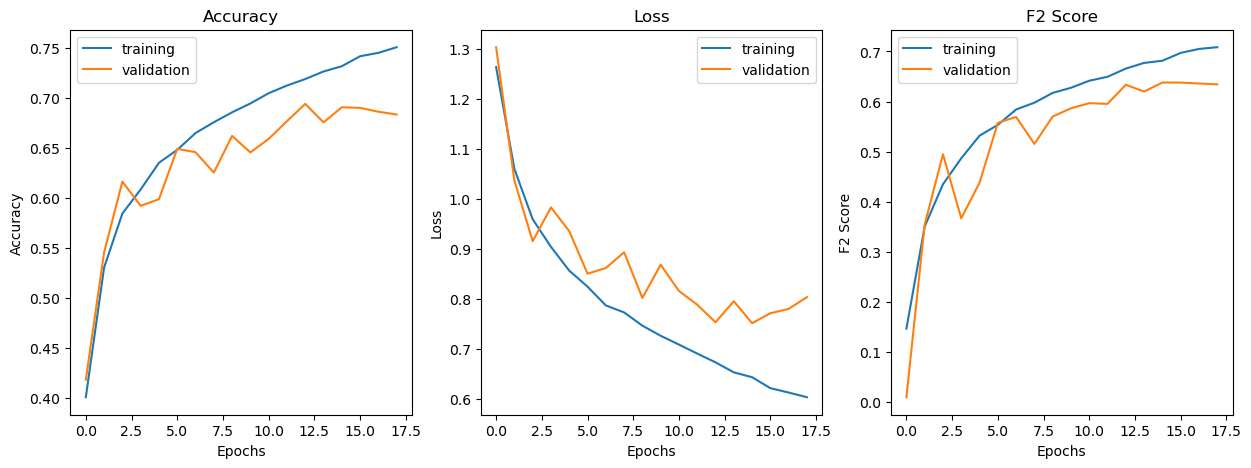

In [103]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()

4/4 [==============================] - 0s 43ms/step


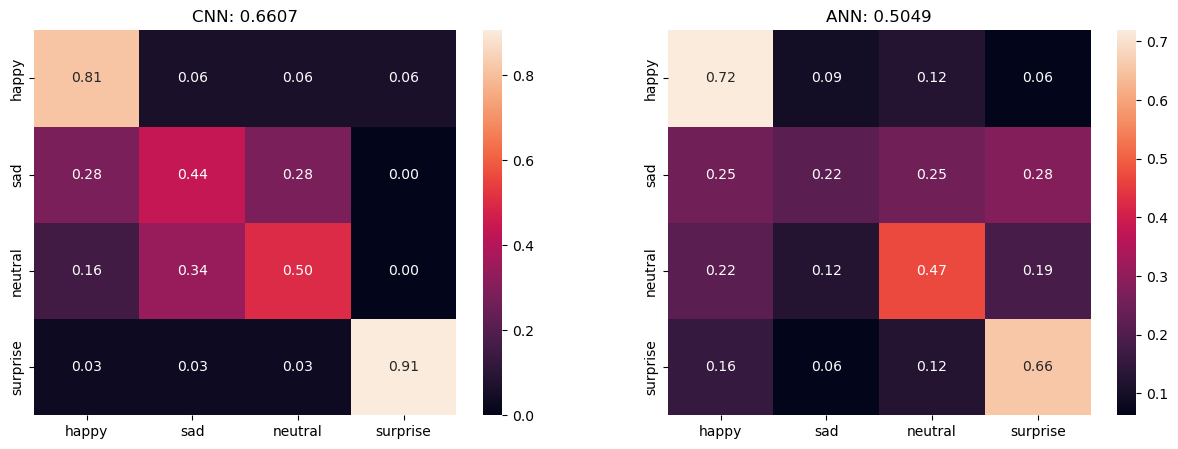

In [104]:
# Assuming you have the class names defined
class_names = ['happy', 'sad', 'neutral', 'surprise']

compare_mlp_cnn_f2_beta(model7, ann, test_set, test_set.labels, class_names, beta=2)

**Observations and Insights:**

* Both training and testing accuracies were more or less stagnant and stopped showing significant improvements.
* The second model performed slightly better than the first model and we can still see that our model is not being able to converge to a good accuracy even on training data.
* This suggests that our architecture doesn't have enough parameters/weights to shape itself to completely understand the distinctions between the four classes.
* I inadverently re-started the ANN/MLP models after running the code for the Transfer Learning models.  Once I did that I lost all history for the ANN/MLP model. This is why the TP/FP/FN/TN values are not the same as they originally were.  
  - It was too late in the process to re-run all of the models again since we havea 11-29-2023 11:59 PM deadline.

## <b>ROC/AUC CNN-ANN/Standard MLP Comparison</b>

In [176]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from scipy import interp

# Function to plot ROC curve
def plot_roc_curve(y_true, y_score, n_classes, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    colors = ['blue', 'green', 'red', 'purple']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

1/1 [==============================] - 1s 633ms/step


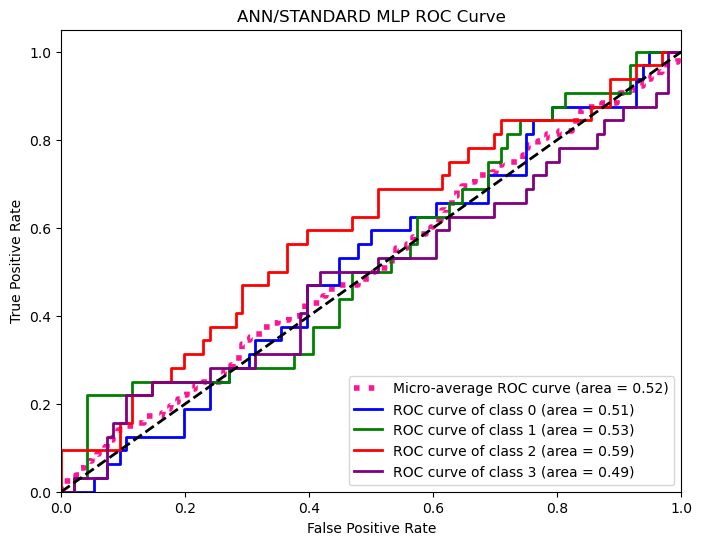

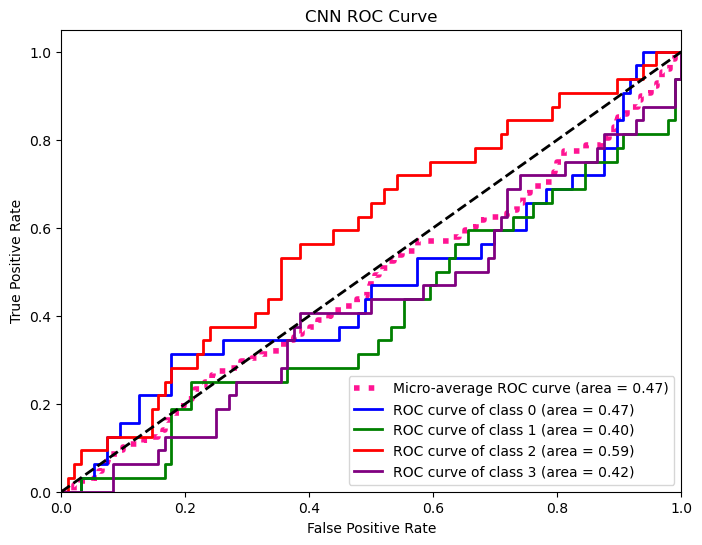

In [180]:
# Get predictions for both models
y_score_ann = ann.predict(test_set)
y_score_cnn = model7.predict(test_set)

class_names = ['happy', 'sad', 'neutral', 'surprise']

# Binarize the labels
y_true_bin = label_binarize(test_set.labels, classes=[0, 1, 2, 3])

# Plot ROC curves
plot_roc_curve(y_true_bin, y_score_ann, n_classes=4, model_name='ANN/STANDARD MLP')
plot_roc_curve(y_true_bin, y_score_cnn, n_classes=4, model_name='CNN')

## Observation
- The results could be misleading because I had to run this code out of order.  
  - Due to time constraints, I could not re-run this code in order of the notebook. That way, you would see the actual ROC/AUC results.
  - Right now, the ROC curves show that there is ANN AUC > CNN AUC.  
    - This does not sound right but that is what the data results is showing us.

In [189]:
!pip install mlxtend

  Using cached mlxtend-0.23.0-py3-none-any.whl (1.4 MB)


## Further Statistical Analysis Using the Wilcoxon Test Statistic

This code performs the Wilcoxon Test Statistic test calculates the p-value, and stat. The p-value will help you determine whether there is a statistically significant difference between the ROC curves of the two models.

In [198]:
from scipy.stats import wilcoxon, ttest_rel

# Assuming y_score_ann and y_score_cnn are the AUC scores for the two models
stat, p_value = wilcoxon(y_score_ann, y_score_cnn)
# or
# stat, p_value = ttest_rel(y_score_ann, y_score_cnn)

print(f'Wilcoxon Test Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpret the results
if any(p_value < 0.05):
    print("There is a significant difference between the models.")
else:
    print("There is no significant difference between the models.")

Wilcoxon Test Statistic: [3372. 3893. 2138. 3640.]
p-value: [7.21958205e-02 5.76253709e-01 2.21751381e-06 2.45830184e-01]
There is a significant difference between the models.


## Observation
- When the statistical test (Wilcoxon or t-test) indicates that there is a significant difference between the models, it means that the AUC scores of the two models are significantly different from each other. In the context of comparing a Convolutional Neural Network (CNN) and a Multi-Layer Perceptron (MLP), this difference could imply that one model performs better than the other in terms of the AUC metric.


When the statistical test (Wilcoxon or t-test) indicates that there is a significant difference between the models, it means that the AUC scores of the two models are significantly different from each other. In the context of comparing a Convolutional Neural Network (CNN) and a Multi-Layer Perceptron (MLP), this difference could imply that one model performs better than the other in terms of the AUC metric.

Here's how you might interpret the results:

1. **Statistical Significance:** The p-value being less than 0.05 suggests that the observed difference in AUC scores is statistically significant.

2. **Model Performance:** Since there is a significant difference, you need to look at the direction of the difference. If, for example, the AUC score of the CNN is higher than that of the MLP, you might conclude that the CNN performs significantly better than the MLP in the given task based on the AUC metric.

In summary, the statistical test suggests a significant difference in AUC scores between the CNN and MLP models. 

## Interpreting p-values

* If p-value < 0.05: You reject the null hypothesis. In the context of model comparison, it suggests that there is a significant difference between the models.
* If p-value >= 0.05: You fail to reject the null hypothesis. It suggests that there is no significant difference between the models.

**Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
 * Our model1 had a test accuracy of about 64 percent and our model2 had a test accuracy of about 68 percent. Although they cannot be regarded as straight-up bad, we can still improve the performances of these models by tweaking our Architecture.
 * One possible reason for our models underperforming is that they are not large enough, i.e, they don't have enough trainable weights to properly tune themselves with the complexity of the problem.


* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?
 * The 'grayscale' color mode showed better performance between 'rgb' and 'grayscale'.
 * The images are already black and white. Therefore having 'rgb' images seems redundant. Plus it adds to the computational inefficiency.


### **Proposed approach**

- **Potential techniques** - What different techniques should be explored?<br>
    - We should try to use CNN models to check how they perform on the image data and different techniques like image augmentation and making the model complex by adding more layers should be tried to improve our model.<br>
- **Overall solution design** - What is the potential solution design?<br>
    - The structure of the solution should be followed like using a base model and then evaluating its performance then we should try to improve the model by adding new layers and we should try to change the activation functions and experiment using data augmentation and pre-trained models and choose the model with best model.<br>
- **Measures of success**- What are the key measures of success?<br>
    - We should try to choose the model with best f2_beta/f1_score as the data is balanced and also look into maximizing our test f1_score/f2_beta scores, because we want our model to perform well on unseen data.


# **Transfer Learning**

We have built two Convolutional Neural Network architectures in Milestone 1. Here, we will further try to achieve better performance by increasing the number of parameters/weights. Therefore, we will start this Milestone with three popular Transfer Learning architectures, namely, VGG16, ResNet v2, and Efficient Net. There are other pre-trained models as well. Link to Keras documentation for pre-trained models - https://keras.io/api/applications/

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. Unlike earleir, we will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [131]:
%%time

batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                        brightness_range=(0.,2.),
                                        rescale=1./255,
                                        shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size = (img_size,img_size),
                                                        color_mode = 'rgb',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                        shuffle = False)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale=1./255,
                                  shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                           target_size = (img_size,img_size),
                                           color_mode = 'rgb',
                                           batch_size = batch_size,
                                           class_mode = 'categorical',
                                           classes = ['happy', 'sad', 'neutral', 'surprise'],
                                           shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
CPU times: total: 359 ms
Wall time: 1.07 s


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [132]:
%%time

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False,
            weights = 'imagenet',
            input_shape = (48, 48, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

### **Model Building**

* In this model, we will import till the **'block5_pool'** layer of the VGG16 model. You can scroll down in the model summary and look for 'block5_pool'. 
* Then we will add a Flatten layer, which receives the output of the 'block5_pool' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [133]:
%%time

transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers on top of it

x = Flatten()(transfer_layer.output) # Flattenning the output from the 3rd block of the VGG16 model
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred) # Initializing the model

CPU times: total: 0 ns
Wall time: 69 ms


### **Compiling and Training the VGG16 Model**


In [134]:
%%time

from keras.callbacks import (ModelCheckpoint,
                             EarlyStopping,
                             ReduceLROnPlateau)

checkpoint = ModelCheckpoint("./vggmodel.h5",
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

CPU times: total: 0 ns
Wall time: 0 ns


In [135]:
%%time

vggmodel.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.001),
              metrics=['accuracy', f2_micro])

CPU times: total: 0 ns
Wall time: 9.43 ms


## <b>Cell Took Approximately 1 Hour+ to complete</b>

In [111]:
%%time

history = vggmodel.fit(train_set,
                       steps_per_epoch = train_set.n//train_set.batch_size,
                       epochs = epochs,
                       validation_data = validation_set,
                       validation_steps = validation_set.n//validation_set.batch_size,
                       callbacks = callbacks_list,
                       shuffle=True)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.3204 - accuracy: 0.3820 - f2_micro: 0.1433
Epoch 1: val_loss improved from -inf to 1.19272, saving model to .\vggmodel.h5
472/472 [==============================] - 214s 449ms/step - loss: 1.3204 - accuracy: 0.3820 - f2_micro: 0.1433 - val_loss: 1.1927 - val_accuracy: 0.4595 - val_f2_micro: 0.1901 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.2113 - accuracy: 0.4431 - f2_micro: 0.2092
Epoch 2: val_loss did not improve from 1.19272
472/472 [==============================] - 223s 473ms/step - loss: 1.2113 - accuracy: 0.4431 - f2_micro: 0.2092 - val_loss: 1.1756 - val_accuracy: 0.4792 - val_f2_micro: 0.2695 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.1875 - accuracy: 0.4580 - f2_micro: 0.2377
Epoch 3: val_loss improved from 1.19272 to 1.22067, saving model to .\vggmodel.h5
472/472 [==============================] - 225s 477ms/step - loss: 

### **Evaluating our VGG16 model**




In [112]:
%%time

vggmodel.evaluate(test_set)

4/4 [==============================] - 2s 425ms/step - loss: 1.1512 - accuracy: 0.4609 - f2_micro: 0.2802
CPU times: total: 8.2 s
Wall time: 2.01 s


[1.151216745376587, 0.4609375, 0.2801809310913086]

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation f2_micro and val_f2_micro also improving similarly?

**Observations and Insights:**
* Both the training and testing f2_micro and val_f2_micro results were slightly improving, and didn't exhibit much of a trend at all.
* This model performed worse than the previous two models

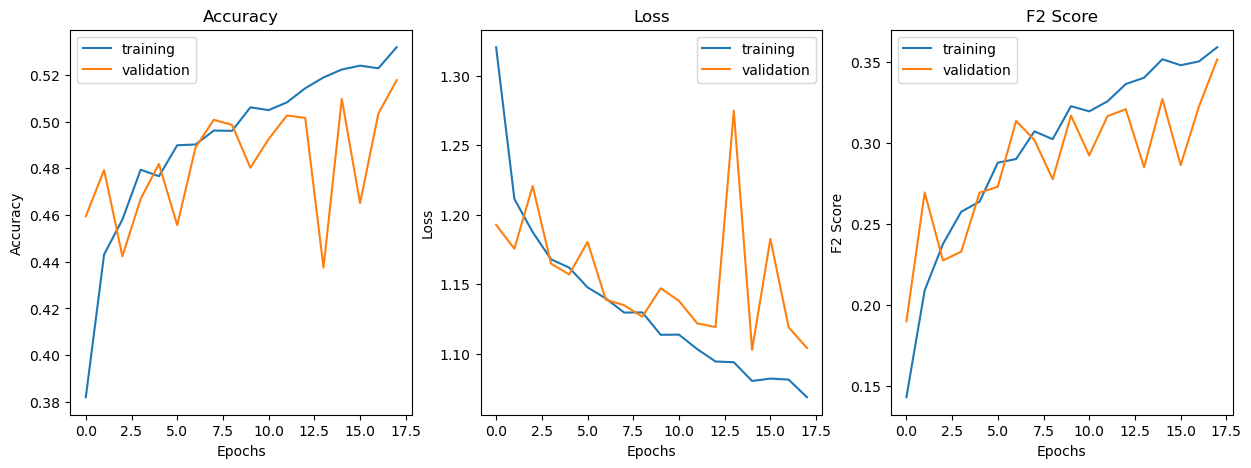

In [113]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()

## **ResNet V2 Model**

In [136]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False,
                      weights = "imagenet",
                      input_shape=(48,48,3))
Resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

### **Model Building**

* In this model, we will import till the **'conv5_block3_add'** layer of the ResNet model. You can scroll down in the model summary and look for 'conv5_block3_add'. 
* Then we will add a Flatten layer, which receives the output of the 'conv5_block3_add' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* We considered using Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [137]:
%%time

transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False

# Add classification layers on top of it

x = Flatten()(transfer_layer_Resnet.output) #Flattenning the output from the 3rd block of the VGG16 model
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

resnetmodel = Model(Resnet.input, pred)

CPU times: total: 46.9 ms
Wall time: 217 ms


### **Compiling and Training the Model**

In [138]:
%%time

from keras.callbacks import (ModelCheckpoint,
                             EarlyStopping,
                             ReduceLROnPlateau)

checkpoint = ModelCheckpoint("./resnetmodel.h5",
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping,checkpoint, reduce_learningrate]

epochs = 20

CPU times: total: 0 ns
Wall time: 0 ns


In [139]:
%%time
resnetmodel.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.001),
              metrics=['accuracy', f2_micro])

CPU times: total: 15.6 ms
Wall time: 12.2 ms


## <b>Cell Took Approximately 40+ minutes to Complete</b>

In [140]:
%%time

history = resnetmodel.fit(train_set,
                          steps_per_epoch=train_set.n//train_set.batch_size,
                          epochs = epochs,
                          validation_data = test_set,
                          validation_steps = test_set.n//test_set.batch_size,
                          callbacks=callbacks_list)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.4595 - accuracy: 0.2532 - f2_micro: 0.0226
Epoch 1: val_loss improved from -inf to 1.40697, saving model to .\resnetmodel.h5
472/472 [==============================] - 232s 475ms/step - loss: 1.4595 - accuracy: 0.2532 - f2_micro: 0.0226 - val_loss: 1.4070 - val_accuracy: 0.2500 - val_f2_micro: 0.0000e+00 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.4054 - accuracy: 0.2636 - f2_micro: 7.3906e-04
Epoch 2: val_loss did not improve from 1.40697
472/472 [==============================] - 217s 459ms/step - loss: 1.4054 - accuracy: 0.2636 - f2_micro: 7.3906e-04 - val_loss: 1.3932 - val_accuracy: 0.2500 - val_f2_micro: 0.0000e+00 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.3981 - accuracy: 0.2603 - f2_micro: 1.6424e-04
Epoch 3: val_loss did not improve from 1.40697
472/472 [==============================] - 217s 460ms/step - loss: 1.3981 - acc

### **Evaluating the ResNet Model**

In [144]:
%%time
resnetmodel.evaluate(test_set)

4/4 [==============================] - 1s 261ms/step - loss: 1.3874 - accuracy: 0.2500 - f2_micro: 0.0000e+00
CPU times: total: 1.69 s
Wall time: 1.22 s


[1.3874256610870361, 0.25, 0.0]

**Observations and Insights:**

* The training didn't go on for all the planned epochs. The training stopped when the validation f2_micro/val_f2_micro stayed stagnant for 10 epochs.
* The testing f2_micro and val_f2_micro is the worst among all the models we have seen so far.
* This may be solved by choosing any other layer than 'conv5_block3_add, to perform transfer learning on.


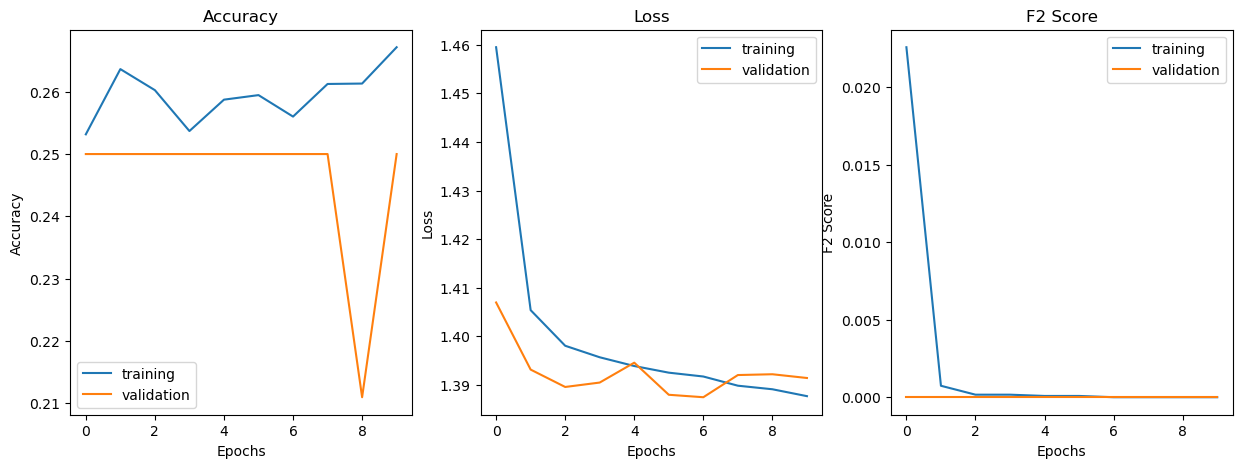

In [145]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()

4/4 [==============================] - 4s 259ms/step


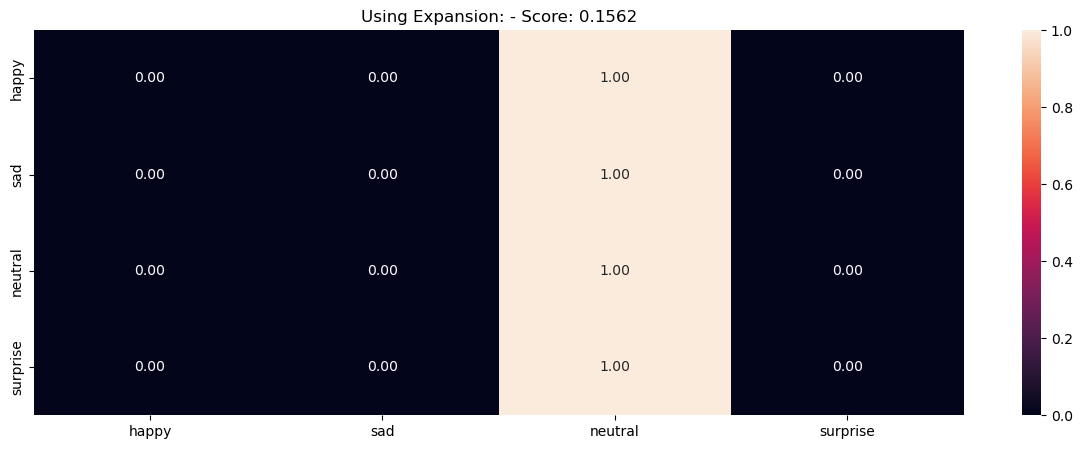

In [152]:
# Assuming you have the class names defined
class_names = ['happy', 'sad', 'neutral', 'surprise']

summarize_net_update(resnetmodel, test_set, test_set.labels, title_text='Using Expansion:')

## **EfficientNet Model**

In [153]:
%%time

import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,
                                   weights="imagenet",
                                   input_shape= (48, 48, 3))


EfficientNet.summary()

Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['normalization[0][0]']          
                                                                                  

### **Model Building**

In [154]:
%%time

transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

x = Flatten()(transfer_layer_EfficientNet.output) #Flattenning the output from the 3rd block of the VGG16 model
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)


Efficientnetmodel = Model(EfficientNet.input, pred)

CPU times: total: 15.6 ms
Wall time: 106 ms


### **Compiling and Training the Model**

In [155]:
%%time

from keras.callbacks import (ModelCheckpoint,
                             EarlyStopping,
                             ReduceLROnPlateau)

checkpoint = ModelCheckpoint("./Efficientnetmodel.h5",
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 20

CPU times: total: 0 ns
Wall time: 0 ns


In [156]:
%%time

Efficientnetmodel.compile(loss = 'categorical_crossentropy',
              optimizer=Adam(learning_rate = 0.001),
              metrics=['accuracy', f2_micro])

CPU times: total: 0 ns
Wall time: 15.3 ms


## <b>Cell Took Approximately 20+ minutes to complete</b>

In [157]:
%%time

history = Efficientnetmodel.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list,
                                shuffle=True)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.4640 - accuracy: 0.2524 - f2_micro: 0.0191
Epoch 1: val_loss improved from -inf to 1.45117, saving model to .\Efficientnetmodel.h5
472/472 [==============================] - 64s 115ms/step - loss: 1.4640 - accuracy: 0.2524 - f2_micro: 0.0191 - val_loss: 1.4512 - val_accuracy: 0.2500 - val_f2_micro: 0.0000e+00 - lr: 0.0010
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.4056 - accuracy: 0.2601 - f2_micro: 8.1992e-04
Epoch 2: val_loss did not improve from 1.45117
472/472 [==============================] - 70s 148ms/step - loss: 1.4056 - accuracy: 0.2601 - f2_micro: 8.1992e-04 - val_loss: 1.3945 - val_accuracy: 0.2500 - val_f2_micro: 0.0000e+00 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.3974 - accuracy: 0.2577 - f2_micro: 1.6424e-04
Epoch 3: val_loss did not improve from 1.45117
472/472 [==============================] - 67s 142ms/step - loss: 1.3974 - 

### **Evaluating the EfficientnetNet Model**

In [158]:
%%time

Efficientnetmodel.evaluate(test_set)

4/4 [==============================] - 1s 130ms/step - loss: 1.3863 - accuracy: 0.2500 - f2_micro: 0.0000e+00
CPU times: total: 500 ms
Wall time: 789 ms


[1.3863308429718018, 0.25, 0.0]

**Observations and Insights:**
* The EfficientNet model's performance was as bad as the Resnet model.
* There was no change at all in the validation f2_micro throughout the epochs it was trained for.
* The performance of these Transfer Learning Architectures has been surprisingly lower than the previous models we built. The VGG16 model had horrible f2_micro, while the rest had about half of their accuracy. So we can conclude that these models couldn't fit themselves to the target objective although they have achieved great results in their respective pretext tasks.
* While we had already seen, that the models we worked with in Milestone 1 were already performing better with Grayscale color mode, we didn't have that option in the Transfer Learning models, as these pre-trained models only accept 3 input channels.
* Therefore we can conclude with enough assurance that our performance is being severely affected when we are using 'rgb' instead of 'grayscale' color mode.

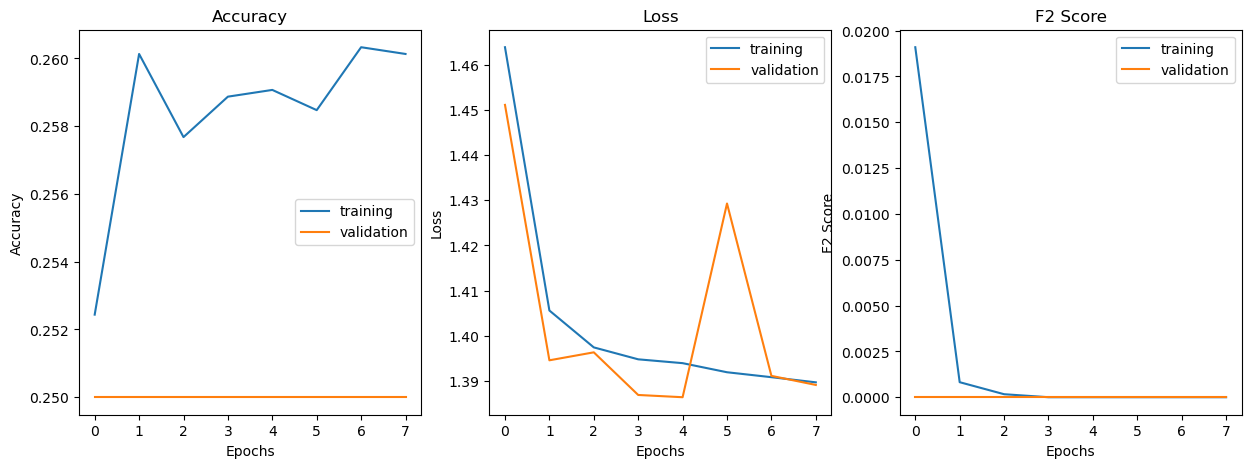

In [159]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()

4/4 [==============================] - 1s 258ms/step


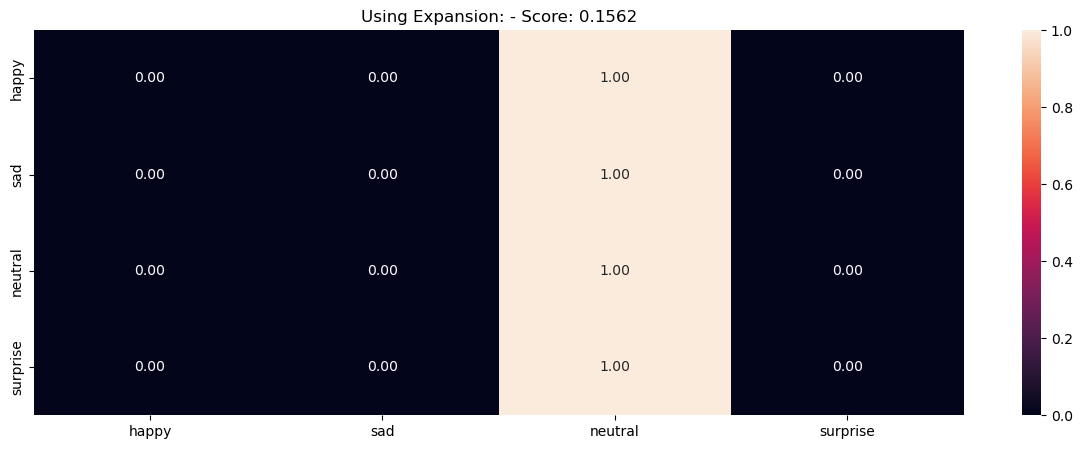

In [160]:
# Assuming you have the class names defined
class_names = ['happy', 'sad', 'neutral', 'surprise']

#compare_mlp_cnn_f2_beta(Efficientnetmodel, ann, test_set, test_set.labels, class_names, beta=2)
summarize_net_update(resnetmodel, test_set, test_set.labels, title_text='Using Expansion:')

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [161]:
%%time

batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                        brightness_range=(0.,2.),
                                        rescale=1./255,
                                        shear_range=0.3)

validation_set =  datagen_validation.flow_from_directory(folder_path + "validation",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = batch_size,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = False)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale=1./255,
                                  shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (img_size,img_size),
                                            color_mode = 'grayscale',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
CPU times: total: 625 ms
Wall time: 1.25 s


### **Model Building**

* In this network, we plan to have 5 Convolutional Blocks
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input shape = (48, 48, 1)**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a Dropout Ratio of **0.2**. This completes the first Convolutional block.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **512 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **512 filters**.
* Add the fifth block, having **128 filters**.
* Then add your Flatten layer, followed by your Dense layers.
* Add your first Dense layer with **256 neurons** followed by a BatchNormalization layer, a **'relu'** Activation, and a Dropout layer. This forms your first Fully Connected block
* Add your second Dense layer with **512 neurons**, again followed by a BatchNormalization layer, **relu** activation, and a Dropout layer.
* Add your final Dense layer with 4 neurons.
* Compile your model with the Adam optimizer.

In [162]:
%%time

no_of_classes = 4

model23 = Sequential()

# Add 1st CNN Block
model23.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (48, 48, 1)))
model23.add(BatchNormalization())
model23.add(Activation('relu'))
model23.add(MaxPooling2D(pool_size = (2,2)))
model23.add(Dropout(0.2))

# Add 2nd CNN Block
model23.add(Conv2D(128, (5, 5) ,padding = 'same'))
model23.add(BatchNormalization())
model23.add(Activation('relu'))
model23.add(MaxPooling2D(pool_size = (2,2)))
model23.add(Dropout(0.2))

# Add 3rd CNN Block
model23.add(Conv2D(512,(3,3),padding = 'same'))
model23.add(BatchNormalization())
model23.add(Activation('relu'))
model23.add(MaxPooling2D(pool_size = (2,2)))
model23.add(Dropout(0.2))

# Add 4th CNN Block
model23.add(Conv2D(512,(3,3), padding='same'))
model23.add(BatchNormalization())
model23.add(Activation('relu'))
model23.add(MaxPooling2D(pool_size=(2, 2)))
model23.add(Dropout(0.2))

# Add 5th CNN Block
model23.add(Conv2D(128,(3,3), padding='same'))
model23.add(BatchNormalization())
model23.add(Activation('relu'))
model23.add(MaxPooling2D(pool_size=(2, 2)))
model23.add(Dropout(0.2))

model23.add(Flatten())

# First fully connected
model23.add(Dense(256))
model23.add(BatchNormalization())
model23.add(Activation('relu'))
model23.add(Dropout(0.2))


# Second fully connected layer
model23.add(Dense(512))
model23.add(BatchNormalization())
model23.add(Activation('relu'))
model23.add(Dropout(0.2))

model23.add(Dense(no_of_classes, activation='softmax'))


model23.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_17 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 128)      

### **Compiling and Training the Model**

In [163]:
%%time

from keras.callbacks import (ModelCheckpoint,
                             ReduceLROnPlateau,
                             CSVLogger)

epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model23_weights_Optimized.h5",
                             monitor = 'val_accuracy',
                             save_weights_only = True,
                             model = 'max',
                             verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

CPU times: total: 0 ns
Wall time: 0 ns


In [164]:
%%time

opt = Adam(learning_rate =0.003)

model23.compile(optimizer = opt,
               loss = 'categorical_crossentropy',
               metrics=['accuracy', f2_micro])

CPU times: total: 0 ns
Wall time: 12.6 ms


## <b>Cell Took Approximately 5+ Hours to Complete</b>

In [165]:
%%time

history = model23.fit(
    x = train_set,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_set,
    callbacks = callbacks
)


Epoch 1/35
472/472 [==============================] - ETA: 0s - loss: 1.5023 - accuracy: 0.2666 - f2_micro: 0.0478
Epoch 1: saving model to model3_weights_Optimized.h5
472/472 [==============================] - 483s 1s/step - loss: 1.5023 - accuracy: 0.2666 - f2_micro: 0.0478 - val_loss: 1.3837 - val_accuracy: 0.2252 - val_f2_micro: 0.0000e+00 - lr: 0.0030
Epoch 2/35
472/472 [==============================] - ETA: 0s - loss: 1.3412 - accuracy: 0.3551 - f2_micro: 0.1085
Epoch 2: saving model to model3_weights_Optimized.h5
472/472 [==============================] - 479s 1s/step - loss: 1.3412 - accuracy: 0.3551 - f2_micro: 0.1085 - val_loss: 10.6521 - val_accuracy: 0.1601 - val_f2_micro: 0.1541 - lr: 0.0030
Epoch 3/35
472/472 [==============================] - ETA: 0s - loss: 1.1600 - accuracy: 0.4768 - f2_micro: 0.2879
Epoch 3: saving model to model3_weights_Optimized.h5
472/472 [==============================] - 441s 935ms/step - loss: 1.1600 - accuracy: 0.4768 - f2_micro: 0.2879 - val

### **Evaluating the Model on Test Set**

In [166]:
%%time

model23.evaluate(test_set)

4/4 [==============================] - 1s 137ms/step - loss: 0.4749 - accuracy: 0.8594 - f2_micro: 0.8175
CPU times: total: 2.03 s
Wall time: 790 ms


[0.4749133586883545, 0.859375, 0.8175264000892639]

**Observations and Insights:**
* We have close to 4 million trainable parameters in this model. That, and the single channel for input images combined, solves the two biggest problems that we had identified earlier.
* We can see the improvement in the training, validation, and testing accuracies. The test accuracy is close to 80 percent.

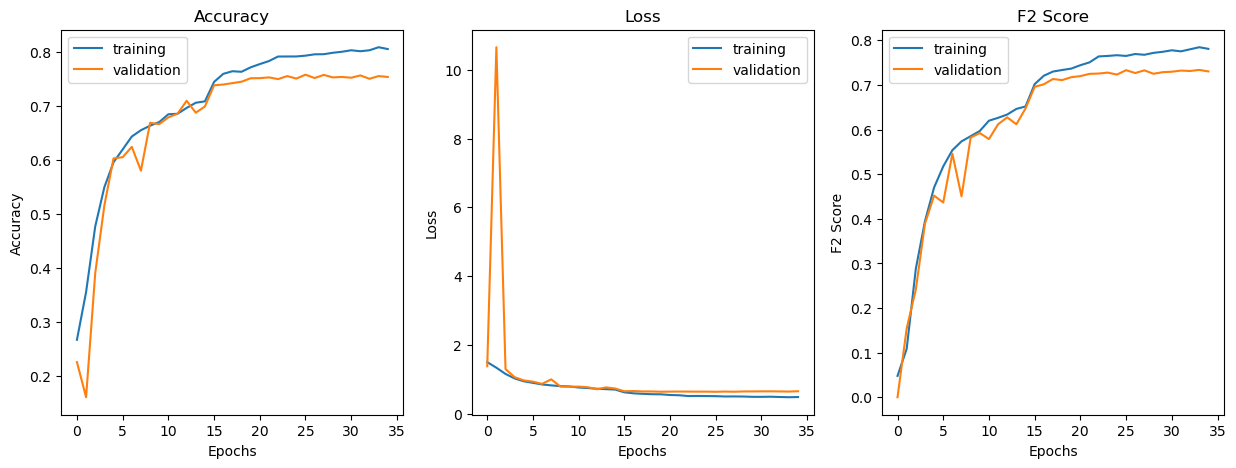

In [167]:
plt.figure(figsize=(15, 5))

# Plotting Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting F2 Score
plt.subplot(1, 3, 3)
plt.plot(history.history['f2_micro'], label='training')
plt.plot(history.history['val_f2_micro'], label='validation')
plt.title('F2 Score')
plt.xlabel('Epochs')
plt.ylabel('F2 Score')
plt.legend()

plt.show()

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 1s 120ms/step
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        32
           1       0.70      0.72      0.71        32
           2       0.67      0.75      0.71        32
           3       0.97      0.91      0.94        32

    accuracy                           0.81       128
   macro avg       0.82      0.81      0.82       128
weighted avg       0.82      0.81      0.82       128



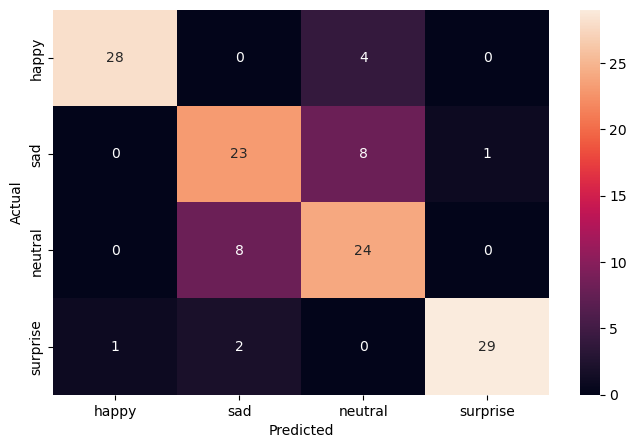

In [168]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (img_size,img_size),
                                            color_mode = 'grayscale',
                                            batch_size = 128,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = True)
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the
pred = model23.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

* From the Confusion matrix, we can see that most images have been classified correctly with ~80% f2_beta/f1_score score. We can use this model to detect facial emotions in real-time.  
* A few images that are from the class 'Neutral' have been misclassified into 'Sad'and vice versa. That can be attributed to how neutral shares characteristics with the class 'sad' with respect to not showing excitement.

## Observation

**Think About It:**

* Do you think our Transfer Learning Architectures can perform better if we use different transfer layers from the pre-trained architectures?
* For example, in your Efficientnetmodel, we are importing the 'block6e_expand_activation' layer using the get_layer() method. You can write the name of any other layer from the model summary.
  - For practice, to get familiar with the Transfer Learning framework and selecting the appropriate layer, we tried to select other layers to see if this would help out the model f1_score/f2_beta score.  But no matter layer we selected, the model continued to give poor/horrible f2_beta/f1_score results.
  - I was looking forward to learning how to select the hyper-parameters and feel confident in doing so.  Due to time constraints of the LAB6 due date and the length of time it took to fit the model, I didn't have enough to do a thorough detailed research into the layer selection process to help improve model overall results.

## **Conclusion:**

* We are going ahead with our final model, i.e, model3. The earlier models have a very less number of trainable parameters.
* We also tried out a few Transfer Learning architectures. But we realized that we couldn't use 'grayscale' color mode with those architectures. And as per our analysis, 'rgb' color mode was giving really poor results when we used 3 input channel images with our Deep Learning Architectures.
* Thus we had to come up with our complex CNN architecture that has a comparable number of trainable parameters to our Transfer Learning Architectures and works with single channel (or 'grayscale') inputs. This final model had 5 Convolutional blocks, with each Conv2D layer having a significantly higher number of filters than all its predecessors.
* As expected, our final model gives us higher accuracies over validation and test data than all the other models.
* The model has consistent values over training, testing, and validation accuracies, suggesting that there is no overfitting.